![alt text](img/LM.png)
# Kurs: Deep Learning, Text Mining i XAI w Pythonie

## Autor: Piotr Ćwiakowski

### Lekcja 8. Sieci neuronowe MLP 

### Spis treści

1. Wprowadzenie do sieci neuronowych.
2. Architektura MLP.
3. Trenowanie sieci neuronowych - teoria.
4. Podsumowanie hiperparametrów i praktyki wskazówki.
5. Budowanie i trenowanie sieci neuronowych - praktyka.

# 1 Wprowadzenie do sieci neuronowych

## 1.1 Podstawowe definicje

W prasie popularnonaukowej, a czasem nawet brukowej, często możemy przeczytać o „sztucznej inteligencji”, „uczeniu maszynowym”, „sieciach neuronowych”. Wokół tych pojęć narosło wiele nieporozumień – spróbujmy na początek dobrze zrozumieć co należy rozumieć przez te pojęcia:

* sztuczna inteligencja (AI) – algorytmy do automatyzacji procesów wykonywanych przez ludzki intelekt (klasyfikacja i prognozowanie, ale również gra w szachy)
* machine learning – techniki do tworzenia zbioru reguł (raczej niż ręcznego ich programowania) na podstawie treningowego zbioru danych i następnie aplikowania do nowych informacji
* deep learning – subdyscyplina machine learningu, która skupia się na sukcesywnej ekstrakcji informacji z danych na podstawie kolejnych warstw
* sieci neuronowe – zbiór modeli służących do modelowania warstw w modelach deep learningowych. Swoją nazwę zawdzięczają zauważeniu analogii pomiędzy architekturą tych funkcji a budową neuronowych w mózgu. Natomiast należy unikać analogii pomiędzy sieciami neuronowymi a ludzkim mózgiem (ponieważ po prostu nie wiemy jak on działa).

## 1.2 Perceptron

Pojedynczy perceptron jest najprostszym przykładem sieci neuronowej. Konstrukcja pojedynczego neuronu jest bardzo prosta. Inputami do neuronu są wartości z innych neuronów lub zmiennych źródłowych, które układane są w równanie liniowe z odpowiednimi wagami. Właśnie ta suma elementów stanowi argument funkcji aktywacji, która jest wywoływana w neuronie.

<img src="img/DL3.png" width="30%">
Źródło: Lantz B., Machine Learning with R, Packt Publishing 2015

Ściślej: 
* Neurony przekazują sygnały wejściowe (dane) do perceptronów i mają przyporządkowaną wagę. 
* Jeden z neuronów w każdej sieci zawsze przekazuje wartość 1 (obciążenie). 
* Perceptron wylicza sumę iloczynów wag i sygnałów 𝑤^𝑇 𝑋.
* Suma iloczynów jest następnie przetwarzana przez funkcję aktywacji, która wspomaga proces uczenia.
* Trenowanie perceptronu następuje poprzez zastosowanie metody gradientu prostego:

$$𝑤^{i+1}=𝑤^{i}−𝜂∇𝐿(𝑤, 𝑋)$$

## 1.3 Metoda gradientu na przykładzie regresji liniowej

Metodę gradientu prostego na przyładzie regresji liniowej jest dość prosta:

<img src="img/DL4.png" width="40%">

(1) Równanie regresji liniowej

(2) Błąd średniokwadratowy (funkcja kosztu)

(3) Pochodne funkcji straty względem parametrów b i W (wskazują kierunek zmiany parametrów w celu minimalizacji funkcji straty

(4) Aktualizacja parametrów przy użyciu gradientu i learning rate (parametr $\alpha < 1$)

## 1.4 Funkcje aktywacyjne

W celu odpowiedniego działania sieci neuronowych, każda jednostka liniowa jest zakończona funkcją aktywacyjną, które zadaniem jest wspomaganie procesu uczenia m. in po przez wygaszanie/wzmacnienie sygnałów (tzw. Threshold activation function). Poniżej przykłady wykorzystywanych funkcji aktywacyjnych, z których najpopularniejsza to RELU – rectified linear unit function.

<img src="img/DL5.png" width="60%">
Źródło: Allaire J. J., Chollet F., Deep learning with R, Manning 2018

RELU:
- prostsze i co za tym idzie szybsze obliczenia (proste do obliczenia wartości funkcji jak i wartości funkcji pochodnej),
- w praktyce sieci z ReLU szybciej zbiegają (algorytmy gradientu prostego potrzebują mniej czasu),
- “wygłuszenie” niepotrzebnych sygnałów (nie pojawiają się wartości < 0, co jest korzystne w niektórych przypadkach).

Optymalność funkcji aktywacyjnych w procesie uczenia sieci podlega nieustannym badaniom. Glorot i Bengio (2010)* w słynnym i ważnym badaniu ustalili, iż problemy głębokich sieci neuronowych mogą się brać z źle dobranych funkcji aktywacji:
* funkcja logistyczna i sigmoidalna mają punkty nasycenia w nieskończonościach a gradient jest tam bliski zera,
* z funkcją RELU połączony jest problem martwych neuronów (losowa inicjalizacja wag przy tworzeniu sieci może spowodować w przypadku ReLU otrzymanie wartości 0 już na starcie przez co neuron ten będzie “martwy” w procesie uczenia – gradient w tym obszarze równy jest zero).

<img src="img/DL8.png" width="60%">

Rozwiązaniem są zmodyfikowane funkcje RELU:
* „przeciekające” ReLU – funkcja która ma nachylenie dodatnie dla argumentów ujemnych (hiperparametr, domyślnie ma wartość 0,01)
* losowa Leaky-ReLU – w trakcie uczenia hiperparametr nachylenia jest losowany a później uśredniany (ustalamy przedział losowania tego hiperparametru)
* parametryczna RELU (PReLU) – nachylenie jest parametrem ustalanym w propagacji wstecznej.
* Wykładnicza funkcja RELU (ELU) – najnowsza, bardzo obiecująca funkcja aktywacyjna.

*Glorot, Xavier, and Yoshua Bengio. "Understanding the difficulty of training deep feedforward neural networks.". JMLR Workshop and Conference Proceedings, 2010.

# 2. Architektura sieci MLP


## 2.1 Podstawowe elementy sieci
Najprostszym, a zarazem popularnym typem sieci neuronowych jest są tzw. sieci *Multilayer Perceptron*, czyli jak sama nazwa wskazuje wielowarstwowe sieci perceptronów. Przykładowa ilustracja takiej sieci:

<img src="img/DL6.png" width="30%">

Części składowe powyższego przykładu to:

- warstwa wejściowa (input layer), której szerokość odpowiada liczbie zmiennych (jest determinowana przez dane, które posiadamy)
- dwie warstwy ukryte (analityk musi podjąć decyzję o liczbie warstw i liczbie perceptronów)
- warstwa wyjściowa, która zwraca wyniki końcowe - liczba perceptronów i rodzaj funkcji aktywacyjnych w tym wypadku zależy od rodzaju zadania:
    * regresja (prognozowanie zmiennej ciągłej) - 1 perceptron,
    * klasyfikacja binarna - 2 perceptrony (p-stwo dla 0 i 1)
    * klasyfikacja wieloetykietowa - tyle perceptronów ile klas (dla każdej obserwacji dysponujemy rozkładem p-stw )

Zauważmy również, że wszystkie neurony są ze sobą połączone i przekazują informację w jedną stronę, czyli sieć jest *fully-connected* i *feedforward*. Model klasy MLP składa się z warstw, które przyjmują informację z poprzedniego kroku (danych wejściowych lub poprzedniej warstwy) i przetwarzają ją za pomocą tzw. wag – parametrów równania liniowego – każda z wag jest pewną liczbą, przez którą przemnażana jest odpowiadająca jej informacja z poprzedniej warstwy (czasem nazywa się to również *forward propagation*).

<img src="img/DL7.png" width="20%">
Źródło: https://sebastianraschka.com/faq/docs/visual-backpropagation.html

## 2.2 Wpływ architektury sieci na proces uczenia

Architektura sieci ma ogromne przełożenie na zachowanie podczas procesu uczenia i jakości modelu w prognozowaniu. Poszczególne elementy mają następujące cechy:

* liczba warstw – powinna rosnąć ze stopniem skomplikowania problemu, przy czym:
wiele problemów można rozwiązać za pomocą jednej warstwy ukrytej a większość problemów biznesowych za pomocą 2-3 warstw,
wraz ze wzrostem specjalizacji kolejne warstwy uczą się coraz bardziej subtelnych szczegółów – można to porównać do liniowych i nieliniowych klasyfikatorów – pierwsza warstwa wychwytuje liniowe zależności, następne szukają nieliniowych.
* liczba jednostek w warstwach – im więcej jednostek w warstwach, tym większe dopasowanie do zbioru uczącego (którego przy odpowiednio dużej sieci można się nauczyć na pamięć) i większe ryzyko przetrenowania. Przy czym
głębsze sieci efektywniej korzystają z tej samej liczby neuronów.
w praktyce pokazano, że nawet sieci o małej liczbie parametrów, ale dostatecznie dużej liczbie iteracji i warstw są w stanie nauczyć się skomplikowanych wzorców.
* rodzaj funkcji aktywacyjnych – wpływają na szybkość uczenia i optymalizacji wag.

Przykłady:
* https://playground.tensorflow.org/

# 3. Trenowanie sieci neuronowych - opis teoretyczny

## 3.1 Inicjacja wag

Pierwszym krokiem po zaplanowaniu architektury sieci jest inicjalizacja wag. Wbrew pozorom sprawa nie jest bez znaczenia ani banalna w konfiguracji. W celu zapewnienia optymalnego sposobu uczenia głębokich sieci neuronowych i zapobieżeniu tzw. problemu niestabilnych gradientów (uczenia się poszczególnych warstw z różną prędkością) kluczowa jest odpowiednia inicjacja wag sieci. Glorot i Bengio (2010) pokazali, że inicjacja wag ze standardowego rozkładu normalnego jest jedną z przyczyn niemożności efektywnego trenowania głębokich sieci.

Zaproponowano tzw. inicjację Xaviera, która zależy od liczby połączeń wejściowych i wyjściowych w danej jednostce:

<img src="img/DL9.png"  width="50%">
Źródło: Géron, Aurélien. Uczenie maszynowe z użyciem Scikit-Learn i TensorFlow. 

Inicjacja Xaviera zapewnia szybsze uczenie się modeli i w znacznym stopniu przyczyniła się do wzrostu popularności głębokich sieci neuronowych. W nowszych publikacjach pojawiły się modyfikacje tej metody dla konkretnych funkcji aktywacyjnych (tzw. inicjacja He).

## 3.2 Rola optimizera i funkcji straty

Jak powiedzieliśmy, startowe wagi są wybierane losowo. Następnie są modyfikowane zgodnie z gradientowym algorytmem optymalizującym (np. *stochastic gradient descent*, SGD) w sekwencyjnej procedurze zwanej propagacją wsteczną.  

<img src="img/DL10.png"  width="25%">
Źródło: Allaire J. J., Chollet F., Deep learning with R, Manning 2018

## 3.3 Optymalizacja wag w sieci neuronowej

Do optymalizacji wag modelu używa się znanego z boostingu algorytmu gradient descent. Przypomnijmy, że polega on na szukaniu minimum funkcji poprzez poruszanie się wzdłuż jej gradientu. Implementacja algorytmu w deep learning wygląda następująco:
* wylosuj wsad (batch) obserwacji z X i Y,
* uruchom sieć, policz wartość funkcji straty,
* policz gradient (pochodną) względem parametrów sieci (tzw. backward pass),
* zmień wartości parametrów w kierunku przeciwnym do kierunku gradientu (gradient pokazuje w którym kierunku funkcja najszybciej maleje).

Słowo stochastic w nazwie algorytmu związane są z tym, że w każdej iteracji losujemy batch obserwacji (jakiś ich niewielki ułamek) do policzenia gradientu i przesunięcia wag. Przejście przez wszystkie obserwacje kończy dużą iterację (zwaną epoch) i następnie funkcja zaczyna pracę od początku. Opisany wariant nosi nazwę mini-batch SGD.

<img src="img/DL13.png"  width="50%">
Źródło: Allaire J. J., Chollet F., Deep learning with R, Manning 2018

## 3.4 Propagacja wsteczna (backward propagation)

* Aktualizacja wag w sieci neuronowej odbywa się sekwencyjnie. Na podstawie gradientu najpierw aktualizowane są wagi w ostatniej warstwie, potem kolejnej, etc.
* W sieciach głębokich występował problem dużej wariancji gradientów – który był najczęściej bardzo duży w ostatniej warstwie (pierwszej aktualizowanej) i stopniowo wygasał wraz z przechodzeniem do niższych warstw.

<img src="img/DL11.png"  width="30%">
Źródło: https://sebastianraschka.com/faq/docs/visual-backpropagation.html

## 3.5 Hiperparametry optimizerów

W wyborze i tuningu optimizera najważniejsze zagadnienia na których skupiamy swoją uwagę to prędkość konwergencji (momentum) i niebezpieczeństwo znalezienia się w minimum lokalnym. Zauważmy że wybór zbyt małego learning_rate (hiperparametr optimizera) może spowodować wpadnięcie w minimum lokalne. Dlatego istotny jest pęd (druga pochodna funkcji straty), która mówi jak szybko zmienia się tempo funkcji. 

Będziemy wtedy wybierać zmiany wag, które nie tyle charakteryzują się szybką poprawą funkcji straty, ale także które mają największy pęd – czyli najszybciej rosnące tempo poprawy funkcji straty.

W algorytmie optymalizującym, w zależności od typu możemy tuningować następujące parametry:
* learning rate (jak w boostingu),
* momentum (pęd - średnia ważona dla gradientów z poprzednich iteracji),
* decay – stopniowe zmniejszanie learning rate pomiędzy iteracjami.

<img src="img/DL14.png"  width="40%">
Źródło: https://towardsdatascience.com/gradient-descent-in-a-nutshell-eaf8c18212f0

## 3.6 Przegląd najważniejszych optimizerów

**Stochastic gradient descent (SGD)**

$$\theta = \theta - \eta \cdot \nabla_\theta J( \theta; x^{(i)}; y^{(i)})$$

Tradycyjne podejście gradientowe nakazuje nam policzyć gradient, a następnie wykonać krok w stronę wskazaną przez ten gradient. Nazwa stochastic pochodzi stąd, że za każdym razem losujemy kolejność naszych obserwacji przy liczeniu gradientu. Rozwiązanie to jest często stosowane w podejściu batchowym. W tej sytuacji nie tylko permutujemy nasze obserwacje, ale również bierzemy tylko ich małą część. Kluczowym parametrem jest *learning rate* $\eta$ (tempo uczenia), które wyznacza nam szybkość z jaką aktualizujemy gradient korzystając z nowych informacji. SGD jest podejściem bardzo bezpiecznym, skutecznym, ale niestety powolnym. Konwergencja następuje zwykle bardzo powoli.

**Momentum**  

Rozwiązaniem powolności SGD jest zastosowanie *momentum* $\gamma$ (rozpędu).  W tej metodzie aktualizacja parametrów przeprowadzany jest nie tylko za pomocą gradientu, ale także przy pomocy wartości tego parametru w poprzednim kroku. Dodatkowo wprowadzony jest nowy parametr 𝛾, który spowalnia pęd (parametr tarcia) – jego typowa wartość to 0,9 (0 to zwykły SGD). Algorytm jest znacznie szybszy od SGD na płaskich powierzchniach (choć może dłużej oscylować wokół minimum z powodu zbyt dużych skoków).

$$
\begin{align}
\begin{split}
v_t &= \gamma v_{t-1} + \eta \nabla_\theta J( \theta) \\  
\theta &= \theta - v_t
\end{split}
\end{align}
$$

**Nestorov (przyśpieszony spadek wzdłuż gradientu)**

Niewielka modyfikacja metody Momentum – pomiar gradientu następuje nie tyle w bieżącym ale nieco dalej, z przodu w kierunku pędu. Podstawowe podejście momentum powoduje, że kolejna aktualizacja gradientu jest wypadkową rozpędu i nowych informacji. W wersji Nestorova najpierw robimy krok wynikający z rozpędu, a następnie korygujemy kierunek robiąc aktualizację już z nowego punktu. Algorytm jest zawsze szybszy niż Momentum.

$$\begin{align}
\begin{split}
v_t &= \gamma v_{t-1} + \eta \nabla_\theta J( \theta - \gamma v_{t-1} ) \\  
\theta &= \theta - v_t
\end{split}
\end{align}
$$
<img src="img/nesterov.jpeg" width="60%">
Źródło: http://cs231n.github.io/neural-networks-3/

**AdaGrad**

Algorytm stosuje adaptacyjny współczynnik uczenia, stopniowo redukując jego wartość, ale w większym stopniu dla stromych obszarów przebiegu funkcji straty. Sposób aktualizacji $\eta$ jest jednak bardzo prosty. Aktualizacja $\eta$ przebiega w oparciu o wielkości wszystkich dotychczasowych gradientów. W rezultacie wcześniejsze gradienty szybko się akumulują co powoduje, że bardzo szybko spada do niskich wartości (zwykle zbyt szybko). 

**AdaMax**
Algorytm stosuje adaptacyjny współczynnik uczenia, stopniowo redukując jego wartość, ale w większym stopniu dla stromych obszarów przebiegu funkcji straty. Sposób aktualizacji $\eta$ jest jednak bardzo prosty. Aktualizacja $\eta$ przebiega w oparciu o wielkości wszystkich dotychczasowych gradientów. W rezultacie wcześniejsze gradienty szybko się akumulują co powoduje, że bardzo szybko spada do niskich wartości (zwykle zbyt szybko). 

**Zaawansowane Algorytmy**

* RMSProp - rozwiązaniem problemu AdaGrad ma być RMSProp. Podobnie jak wcześniej $\eta$ jest aktualizowana w oparciu o wcześniejsze gradienty, tylko tym razem są one stopniowo wygaszane (tak jak w średniej wykładniczej). Dzięki temu zabiegowi wielkość ta nie rośnie tak szybko, a w konsekwencji learning rate spada wolniej, w bardziej odpowiednim tempie.

* Adam – połączenie zalet RMSProp i momentum – obecnie najbardziej preferowany algorytm optymalizacji wag.  W tym podejściu równoważą się dwie siły z jednej strony akumulujemy wcześniejsze gradienty aby rozpędzać naszą zmianę, a z drugiej akumulacja kwadratów gradientów odpowiada za ich spowalnianie.
$$\begin{align}
\begin{split}
m_t &= \beta_1 m_{t-1} + (1 - \beta_1) g_t \\  
v_t &= \beta_2 v_{t-1} + (1 - \beta_2) g_t^2  
\end{split}
\end{align}
$$

$$\theta_{t+1} = \theta_{t} - \dfrac{\eta}{\sqrt{\hat{v}_t} + \epsilon} \hat{m}_t$$
Autorzy tego pomysłu zauważają jednak, że tak skonstruowane wartości m i v charakteryzują się pewnym obciążeniem, z tego powodu zaproponowali następującą korektę.
$$\begin{align}
\begin{split}
\hat{m}_t &= \dfrac{m_t}{1 - \beta^t_1} \\
\hat{v}_t &= \dfrac{v_t}{1 - \beta^t_2} \end{split}
\end{align}$$

Co to wszystko oznacza dla nas w praktyce? Otóż możemy rozpocząć od Adama i na nim skończyć jeżeli nasze wyniki są dobre. Z innymi optymalizatorami eksperymentować w razie potrzeby i posiadanego czasu. Poniższa animacja doskonale ilustruje różnice w zachowaniu i sposobie działania poszczególnych optymalizatorów.

<img src="img/DL17.png"  width="45%" align='left'> 
<img src="img/contours_evaluation_optimizers.gif"  width="45%" align='center'>

Źródło: http://ruder.io/optimizing-gradient-descent/index.html#visualizationofalgorithms

Do poczytania:
* https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/
* http://ruder.io/optimizing-gradient-descent/index.html#visualizationofalgorithms
* http://cs231n.github.io/neural-networks-3/

Do eksperymentowania:
* https://playground.tensorflow.org/

## 3.7 Overfitting i underfitting
Overfitting w sieciach neuronowych można rozpoznać spoglądając na wartości metryk i funkcji straty dla zbioru treningowego i walidacyjnego. Jeśli wartości metryk (np. accuracy) dla zbioru treningowego wciąż rosną w przeciwieństwie do zbioru walidacyjnego możemy mieć styczność z overfittingiem. W takim przypadku należy dodać lub zwiększyć regularyzację (L1, L2, dropout).

W sytuacji underfittingu natomiast wartości metryk dla obu zbiorów będą bardzo niskie (a funkcji straty wysokie). W tym przypadku należy rozbudować architekturę naszej sieci oraz sprawdzić różne warianty parametrów jak funkcje aktywacji, batch size etc.

<img src="img/DL18.png"  width="100%">

## 3.8 Trenowanie sieci: Batch normalization

* Metoda opracowana w 2015 r. w celu rozwiązania problemu zanikających oraz wybuchających neuronów.

* _Batch normalization_ redukuje wariancję w nowo powstałych neuronach (podobnie jak klasyczna standaryzacja z pierwotnych zmiennych) przez co algorytm optymalizujący potrafi znaleźć minimum w krótszym czasie.

* _Batch normalization_ polega na wstawieniu do modelu przed każdą funkcją aktywacyjną operacji wyśrodkowania i normalizacji a następnie przeskalowaniu i przesunięciu wyników za pomocą 2 parametrów, indywidualnych dla każdej warstwy.

Operacja pozwala określić optymalną skalę dla danych wejściowych.

<img src="img/DL12.png"  width="30%">
Źródło: https://towardsdatascience.com/batch-normalization-in-neural-networks-1ac91516821c

## 3.9 Regularyzacja sieci neuronowej

### 3.9.1 Regularyzacja wag L1/L2

Funkcje regularyzujące (L1, L2, L1/L2) – mechanizm działania jest identyczny z równaniami liniowymi. Przypomnijmy wzory:

L1 – LASSO

$$𝐹𝑢𝑛𝑘𝑐𝑗𝑎𝑆𝑡𝑟𝑎𝑡𝑦_{𝐿1}=\sum_{𝑖=1}^{𝑁}(𝑦_𝑖−𝑥_𝑖 𝛽)^2 +\alpha\sum_{𝑖=1}^𝐾|𝛽_𝑖 |$$ 
L2 - Ridge regression:

$$𝐹𝑢𝑛𝑘𝑐𝑗𝑎𝑆𝑡𝑟𝑎𝑡𝑦_{𝐿2}=\sum_{𝑖=1}^{𝑁}(𝑦_𝑖−𝑥_𝑖 𝛽)^2 + \lambda\sum_{𝑖=1}^𝐾𝛽_𝑖^2$$

Gdzie:  
𝛼 - hiperparametr regularyzacji L1,   
𝜆 - hiperparametr regularyzacji L2, 
𝛽 - parametry estymowane przez model,  
K – liczba zmiennych.

### 3.9.2 Warstwa dropout

Zabieg, polegający na losowej dezaktywacji części neuronów w każdej iteracji. Inne neurony muszą wtedy przejąć rolę tych wyłączonych przez co ich funkcjonalności zaczynają się dublować – zapobiega przetrenowaniu modelu.

<img src="img/DL19.png"  width="45%">
Źródło: https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5

# 4 Podsumowanie hiperparametrów i praktyki wskazówki

## 4.1 Najważniejsze hiperparametry sieci MLP

Konstrukcja sieci:
* Liczba warstw
* Liczba unitów (neuronów w warstwie)
* Typ funkcji aktywacyjnej (w praktyce wariant RELU)
* Frakcja losowo usuwanych neuronów (zastępuje regularyzacja)
* Regularyzacja L1 i L2

Parametry dopasowania:
* Liczba iteracji (epoch)
* Liczba obserwacji w batchu

Wybór optymalizatora:
* Do obrazów: najpopularniejszy SGD_momentum
* Do zastosowań biznesowych: obecnie ADAM

Wybór parametrów optymalizatora:
* learning rate (jak w boostingu)
* momentum (średnia ważona dla gradientów z różnych iteracji)
* decay – stopniowe zmniejszanie learning rate pomiędzy iteracjami 

## 4.2 Dobre praktyki

1. Funkcje aktywacyjne są ważne i najczęściej używa się rodziny funkcji RELU
2. Lepiej jest na początku ustawić dużą liczbę iteracji – żeby lepiej zrozumieć proces uczenia, zaobserwować przetrenowanie, etc.
3. Dobrze jest zaczynać od domyślnych wartości parametrów (zwykle odzwierciedlają najlepsze praktyki w modelowaniu).
4. Różne pakiety i rozwiązania (frameworks) dają różne rezultaty.
5. Należy korzystać i sprawdzać działanie narzędzi NN do przetrenowania: dropout, regularyzacja, etc.
6. Z powodu 5. nie należy bać się budować skomplikowanych modeli dla małych zbiorów danych.
7. Jeśli z sieci nic nie wychodzi:
    * Zacznij od bardzo prostej sieci i stopniowo dodawaj warstwy.
    * Zacznij od małej frakcji obserwacji i stopniowo dodawaj zmienne.
    * Zmniejsz batch size
    * zestandaryzuj zmienne
    * Przepuść architekturę sieci przez jakąś standardową bazę danych, która zawsze „wychodzi”
    
Źródło: 
* https://beamandrew.github.io/deeplearning/2017/06/04/deep_learning_works.html  
* https://blog.slavv.com/37-reasons-why-your-neural-network-is-not-working-4020854bd607


## 4.3 Narzędzia pracy w Pythonie


### 4.3.1 TensorFlow

* Komputerowa biblioteka ogólnego zastosowania dla obliczeń numerycznych (nie tylko deep learning) napisana w języku C++.
* Open-source.
* Pozwala na rozproszone obliczenia na wielu CPU, GPU i TPU.
* Stworzona przez Google Brain Team.

<img src="img/DL20.png"  width="60%">

### 4.3.2 Keras

Wysokopoziomowe API działające na Tensorflow, CNTK oraz Theano służące do budowy sieci neuronowych. 

Jedną z największych zalet Kerasa jest jego prostota - użytkownik w bardzo prosty i przyjemny sposób może zbudować skomplikowane sieci neuronowe np. sieci konwolucyjne czy rekurencyjne.

# 5 Budowanie i trenowanie sieci neuronowych - praktyka

## 5.1 Przygotowanie środowiska

In [ ]:
# !pip install tensorflow
# !pip install keras

In [1]:
# Podstawowe biblioteki
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Pomocnicze biblioteki
import os
import time
import gc
import pickle
from __future__ import print_function

# Machine Learning
from sklearn.model_selection import train_test_split,StratifiedKFold,KFold
from sklearn import metrics
from sklearn.metrics import roc_auc_score

# tensorflow/keras
import keras
import tensorflow as tf
from keras import regularizers
from keras.backend import set_session
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers.activation import PReLU
from keras.preprocessing.text import Tokenizer

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3170671592731996773
xla_global_id: -1
]


### 5.2 Przygotowanie zbioru
Sieci neuronowe, ponieważ operują wyłącznie na funkcjąch, które jako input przyjmują liczby rzeczywiste, to musimy odpowiednio przygotować zmienne kategoryczne (np przez one hot encoding). Dodatkowo, podobnie jak w przypadku SVM i kNN należy znormalizować zmienne. Teoretycznie nie jest to niezbędne, ale ze względu na sposób optymalizacji oraz metody inicjalizacji parametrów, stosowanie nieznormalizowanych zmiennych może spowodować, że sieć nie będzie się uczyć poprawnie.

In [3]:
df_o = pd.read_csv("data/bank-balanced.csv")
print(df_o.shape)
df_o.head()

(11162, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
# Zdefiniowanie list zmiennych
numFeatures = ['age', 'balance', 'duration', 'campaign', 'pdays','previous', 'day']
catFeatures = [ 'job', 'marital', 'education', 'default',  'housing', 'loan', 'contact',  'month', 'poutcome']
target = "deposit"

# One hot encoding
dummLev = pd.get_dummies(df_o[catFeatures], drop_first=True)

# Połączenie zmiennych numerycznych, kategorycznych w postaci on hot encoding oraz targetu
df = pd.concat([df_o[numFeatures], dummLev, df_o[[target]]], axis=1)

# Standaryzacja zmiennych ciągłych
df[numFeatures] = df[numFeatures].apply(lambda x: (x-x.mean())/x.std())

# Konwersja zmiennej binarnej
df[target] = (df[target]=="yes").astype(int)

# Finalne wymiary zbioru
df.shape

(11162, 43)

In [5]:
df.head()

,age,balance,duration,campaign,pdays,previous,day,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,deposit
0,1.491438,0.252514,1.930139,-0.554144,-0.481162,-0.363244,-1.265689,0,0,0,...,0,0,1,0,0,0,0,0,1,1
1,1.239620,-0.459953,3.154470,-0.554144,-0.481162,-0.363244,-1.265689,0,0,0,...,0,0,1,0,0,0,0,0,1,1
2,-0.019470,-0.080157,2.929770,-0.554144,-0.481162,-0.363244,-1.265689,0,0,0,...,0,0,1,0,0,0,0,0,1,1
3,1.155681,0.293749,0.596339,-0.554144,-0.481162,-0.363244,-1.265689,0,0,0,...,0,0,1,0,0,0,0,0,1,1
4,1.071742,-0.416858,0.867132,-0.186777,-0.481162,-0.363244,-1.265689,0,0,0,...,0,0,1,0,0,0,0,0,1,1


In [6]:
features = df.columns.tolist()
features.remove(target)
print(features)

['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'day', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_married', 'marital_single', 'education_secondary', 'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']


## 5.3 Przygotowanie funkcji pomocniczych

### 5.3.1 Funkcja do wyboru funkcji aktywacji

In [7]:
# Funkcja pomocnicza,która pozwoli nam również zaawansowane funkcje aktywacji wybierać po imieniu
def actModel(model, activation):
    if activation=='prelu':
        model.add(PReLU(weights=None, alpha_initializer="zero"))
    else:
        model.add(Activation(activation))
    return

### 5.3.2 Funkcja budująca sieć w określonej architekturze

In [8]:
# Wydzielona funkcja, która odpowiada wyłącznie za budowę sieci.
def create_network(n=3, nu1=10, nu2=5, nu3=5,
                   activation='relu',
                   dropout=Dropout,
                   dropout_rate=0,
                   regu=0,
                   kernel_initializer='lecun_normal',
                   optimizer='SGD',
                   num_classes=1, 
                   inputShape=10, dropout_all_layers = False, debug=False, *args, **kwargs):
    nu=[nu1, nu2, nu3]
    # Jeżeli włączony jest tryb debug wyświetlimy parametry funkcji
    if debug:
        print(locals())
        
    # Inicjacja podstawowego modelu keras w trybie sekwencyjnym
    # W ten sposób najłatwiej zbutować w pełni połączone sieci feed forward.
    model = Sequential()
    
    # Definicja inputów do sieci oraz pierwszej warstwy
    # nu[0] odpowiada za liczbę neuronów w pierwszej warstwie
    # dodatkowo ustalamy jak inicjalizować parametry raz czy stosować regularyzację.
    model.add(Dense(nu[0],input_shape=(inputShape,),
                    kernel_initializer=kernel_initializer, kernel_regularizer=regularizers.l2(regu)))
    
    # Dodanie funkcji aktywacji do pierwszej warstwy.
    actModel(model, activation)
    
    # Opcjonalne włączenie mechanizmu dropout
    if dropout_rate > 0.01:
        model.add(dropout(dropout_rate))
    
    # Kolejne warstwy budowane są w ten sam sposób, co pozwala budować je w pętli
    # Pierwsza warstwa jako jedyna musiała mieć zdefiniowany input
    # W pozostałych warstwach model automatycznie keras połączy warstwy,
    # Input do kolejnej warstwy będzie outputem z wcześniejszych warstw.
    for i in range(1, n):
        # Inicjalizacja warstwy przez potanie liczby neuronów oraz sposobu inicjacji
        model.add(Dense(nu[i], kernel_initializer=kernel_initializer))
        # Definicja funkcji aktywacji
        actModel(model, activation)
        
        # Opcjonalne dodanie dropout
        if dropout_rate > 0.01 and dropout_all_layers:
            model.add(dropout(dropout_rate))

    # Aby "zakończyć" sieć niezbędne jest przygotowanie odpowiedniej liczby neuronów
    # Wystarczy jeden neuron dla regresji
    # Dla klasyfikacji binarnej oraz wieloklasowej potrzeba tyle neuronów co klas.
    # Dla binarne będą to dwa neurony.
    # W przypadku klasyfikacji wieloklasowej target musi być również podany w postaci one- hot encoding.
    model.add(Dense(num_classes))
    
    # Dla klasyfikacji binarnej lub wieloklasowej jako funkcję aktywacji stosujemy softmax
    # Będzie on odpowiadał transformacji logistycznej.
    # W problemie regresji możemy po prostu wykorzystać funkcję liniową.
    # Na chwilę obecną budujemy wrapper dla klasyfikacji binarnej
    # Poniżej pozostawiamy softmax, z funkcją straty categorical_crossentropy oraz accuracy jak bazową metryką.
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

### 5.3.3 Wrapper do trenowania sieci dla pojedynczego splitu

In [9]:
# Funkcja net będzie naszym wrapperem do budowania siecie, trenowania, oraz zbierania wyników/statystyk.
def net(train, test, features, target, epochs = 30, batchSize=100, debug=False, *args, **kwargs):
    
    # Przygotowanie zmiennych
    y_train = tf.keras.utils.to_categorical(train[target].values)
    y_test = tf.keras.utils.to_categorical(test[target].values)
    x_train = train[features].values
    x_test = test[features].values
    
    num_classes = y_train.shape[1]
    
    # Wyświetlenie informacji opisowych jeżeli jesteśmy w trybie debugowym
    if debug:
        print('Loading data...')
        print(len(x_train), 'train sequences')
        print(len(x_test), 'test sequences')
        print(num_classes, 'classes')
        print('x_train shape:', x_train.shape)
        print('x_test shape:', x_test.shape)
        print('\nBuilding network 1...')
    
    # Stworzenie modelu z użyciem funkcji create_network.
    model = create_network(num_classes=num_classes, inputShape=x_train.shape[1], debug=debug, *args, **kwargs)
    
    # Przygotowanie zmiennych do przechowywania statystyk dotyczących szkolenia
    history_model = dict()
    loss = []
    valLoss = []
    acc = []
    valAcc = []
    auc = []
    valAuc = []
    
    
    bestTrainProba = []
    bestTestProba = []
    bestAuc = 0
    # Iteracyjne uruchomienie szkolenia.
    # UWAGA! W "profesjonalnym" wykorzystaniu Kerasa stosuje się tzw. callbacki, 
    # callbacki to funkcje do uruchamiania pomiędzy iteracjami.
    # W naszej dydaktycznej implementacji sami będziemy iterować szkolenie w pętli po jednej iteracji
    for z in range(epochs):
        # Wykonaj jedną ideacje szkolenia
        histModel = model.fit(x_train,
                              y_train,
                              batch_size=batchSize,
                              epochs=1,
                              verbose=debug,
                              validation_split=0.0,
                              validation_data=(x_test, y_test))
        # Zrób prognoze na zbiorze treningowym
        probaTrain = model.predict(x_train,
                                   batch_size=y_train.shape[0],
                                   verbose=debug)
        # Zrób prognozę na zbiorze testowym
        probaTest = model.predict(x_test,
                                  batch_size=y_test.shape[0],
                                  verbose=debug)
        # Obliczenie statystyk AUC
        # We wcześniejszych wersjach Keras nie miał wbudowanego liczenia auc pomiędzy iteracjami
        aucTrain = roc_auc_score(train[target], probaTrain[:,1])
        aucTest = roc_auc_score(test[target], probaTest[:,1])
        if debug:
            print(aucTrain, aucTest)
            
        # Ręczna implementacja zapisywania prognoz z najlepszej iteracji
        if aucTest>bestAuc:
            bestAuc = aucTest
            bestTrainProba = probaTrain[:, 1].tolist()
            bestTestProba = probaTest[:, 1].tolist()
        
        # Zapisanie wyników w tej iteracji
        loss.append(histModel.history['loss'][0])
        valLoss.append(histModel.history['val_loss'][0])
        auc.append(aucTrain)
        valAuc.append(aucTest)
        
    # Zapisanie wyników ze wszystkich iteracji do słownika
    history_model['loss'] = loss
    history_model['valLoss'] = valLoss
    history_model['auc'] = auc
    history_model['valAuc'] = valAuc
    return max(valAuc), bestTrainProba, bestTestProba, history_model


## 5.4 Pierwsze uruchomienie

In [10]:
test_size=0.3
X_train, X_valid = train_test_split(df, test_size=test_size, random_state=2020, stratify=df[target].values)
score, bestTrainProba, bestTestProba, history = net(X_train, X_valid, features, target, n=2, nu1=400, nu2=100,
                                                    epochs = 50, batchSize=50, debug=True)
print(score)


Loading data...
7813 train sequences
3349 test sequences
2 classes
x_train shape: (7813, 42)
x_test shape: (3349, 42)

Building network 1...
{'n': 2, 'nu1': 400, 'nu2': 100, 'nu3': 5, 'activation': 'relu', 'dropout': <class 'keras.layers.regularization.dropout.Dropout'>, 'dropout_rate': 0, 'regu': 0, 'kernel_initializer': 'lecun_normal', 'optimizer': 'SGD', 'num_classes': 2, 'inputShape': 42, 'dropout_all_layers': False, 'debug': True, 'args': (), 'kwargs': {}, 'nu': [400, 100, 5]}
1/1 [==============================] - 0s 69ms/step
0.8661881242311379 0.8719483716662124
1/1 [==============================] - 0s 26ms/step
0.8833274130717012 0.8887348755173813
1/1 [==============================] - 0s 26ms/step
0.8909873839947402 0.8957294905328267
1/1 [==============================] - 0s 23ms/step
0.8956146828270755 0.9003523949913709
1/1 [==============================] - 0s 22ms/step
0.898919713235931 0.9038888614716479
1/1 [==============================] - 0s 27ms/step
0.9022737944

0.9223035918254661


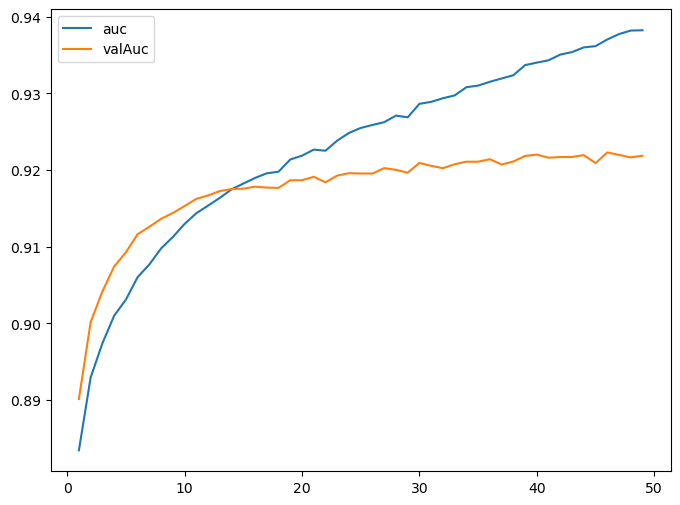

In [11]:
history = pd.DataFrame(history)
print(history.valAuc.max())
history.loc[1:, ["auc", "valAuc"]].plot(figsize=(8,6))
plt.show()

## 5.5 Przegląd hiperparametrów
Ze względu na czasochłonność obliczeń nasze eksperymenty będziemy przeprowadzać na jednym tylko splicie. Uzyskane wyniki, informujące o charakteryce różnych konfiguracji będą w pełni analogiczne do wyników z walidacji krzyżowej. Zaczniemy od porównania treningu z wykorzystaniem różnych mechanizmów treningu (optymalizatorów) oraz trzech diametralnie różnych struktur sieci. Zwrócimy uwagę na następujące elementy:
* Jak szybko osiągamy najlepszy wynik na zbiorze walidacyjnym (po ilu iteracjach)
* Jak stabilnie zmieniają się wartości na zbiorach treningowym i testowym
* Jak silne jest przetrenowanie w miejscu optymalnym.

In [12]:
# 1-krotny split:
test_size=0.3
X_train, X_valid = train_test_split(df, test_size=test_size, random_state=2020, stratify=df[target].values)

In [13]:
# stworzenie folderu na obrazki z wykresami:
try:
    os.mkdir('./imgNets/')
except:
    print('Folder już istnieje')

Folder już istnieje


### 5.5.1 Wybór optimizera

Wybór funkcji optymalizującej zwykle powinno się zrobić na początku - żeby wybrać ten, który jest właściwy do danego zbioru/zadania - nie powinno się to zmieniać w toku dalszego tuningu (ale warto się upewnić testując kilka konfiguracji).

In [14]:
# Lista optimizerów które będziemy sprawdzać
opti = ["SGD", "RMSprop", "Adagrad", "Adadelta", "Adam", "Adamax"]

0
SGD 0.9190628739324262
1
RMSprop 0.9231779634044204
2
Adagrad 0.902596794185447
3
Adadelta 0.7832082391908719
4
Adam 0.9249367198155845
5
Adamax 0.9239407587328086


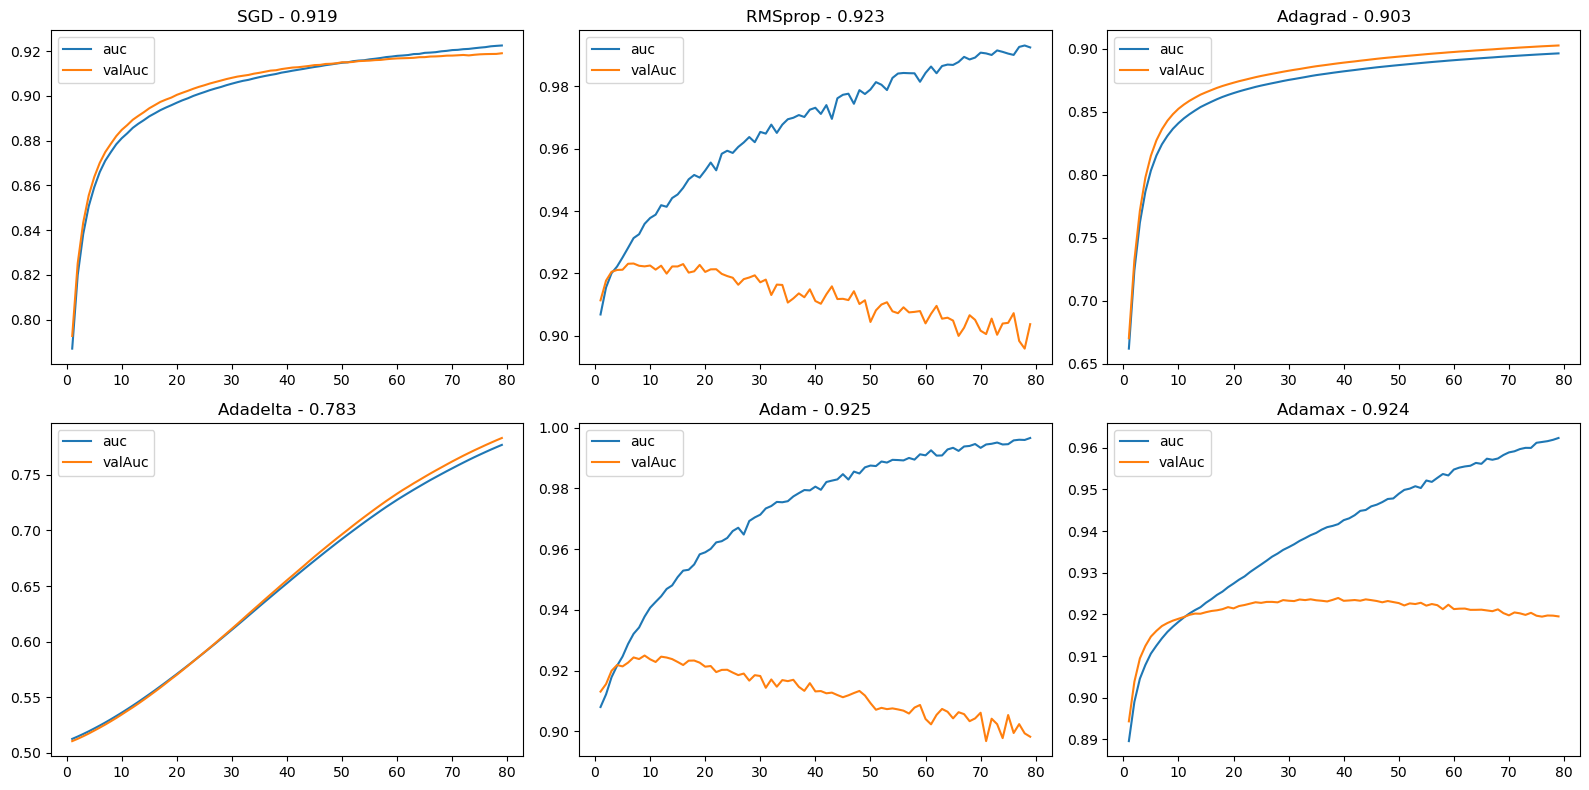

In [15]:
fig, ax = plt.subplots(2, 3, figsize=(16,8))
ax = ax.flatten()

# konfiguracja 1.
n = 2
nu1 = 100
nu2 = 40
nu3 = 10

for i, opt in enumerate(opti):
    score, bestTrainProba, bestTestProba, history = net(X_train, X_valid, features, target, n=n, nu1=nu1, nu2=nu2, nu3=nu3,
                                    epochs = 80, batchSize=100, optimizer=opt, debug=False)
    print(opt, score)
    history = pd.DataFrame(history)
    history.loc[1:, ["auc", "valAuc"]].plot(ax = ax[i])
    ax[i].set_title(opt+ " - " + str(round(score, 3)))
    gc.collect()

plt.tight_layout()
fig.savefig(f"imgNets/opti_{n}_{nu1}_{nu2}_{nu3}.png")
plt.show()

SGD 0.9231579368979086
RMSprop 0.9238059374300412
Adagrad 0.9133685513754992
Adadelta 0.8723185044204937
Adam 0.925058666935594
Adamax 0.9246009182153238


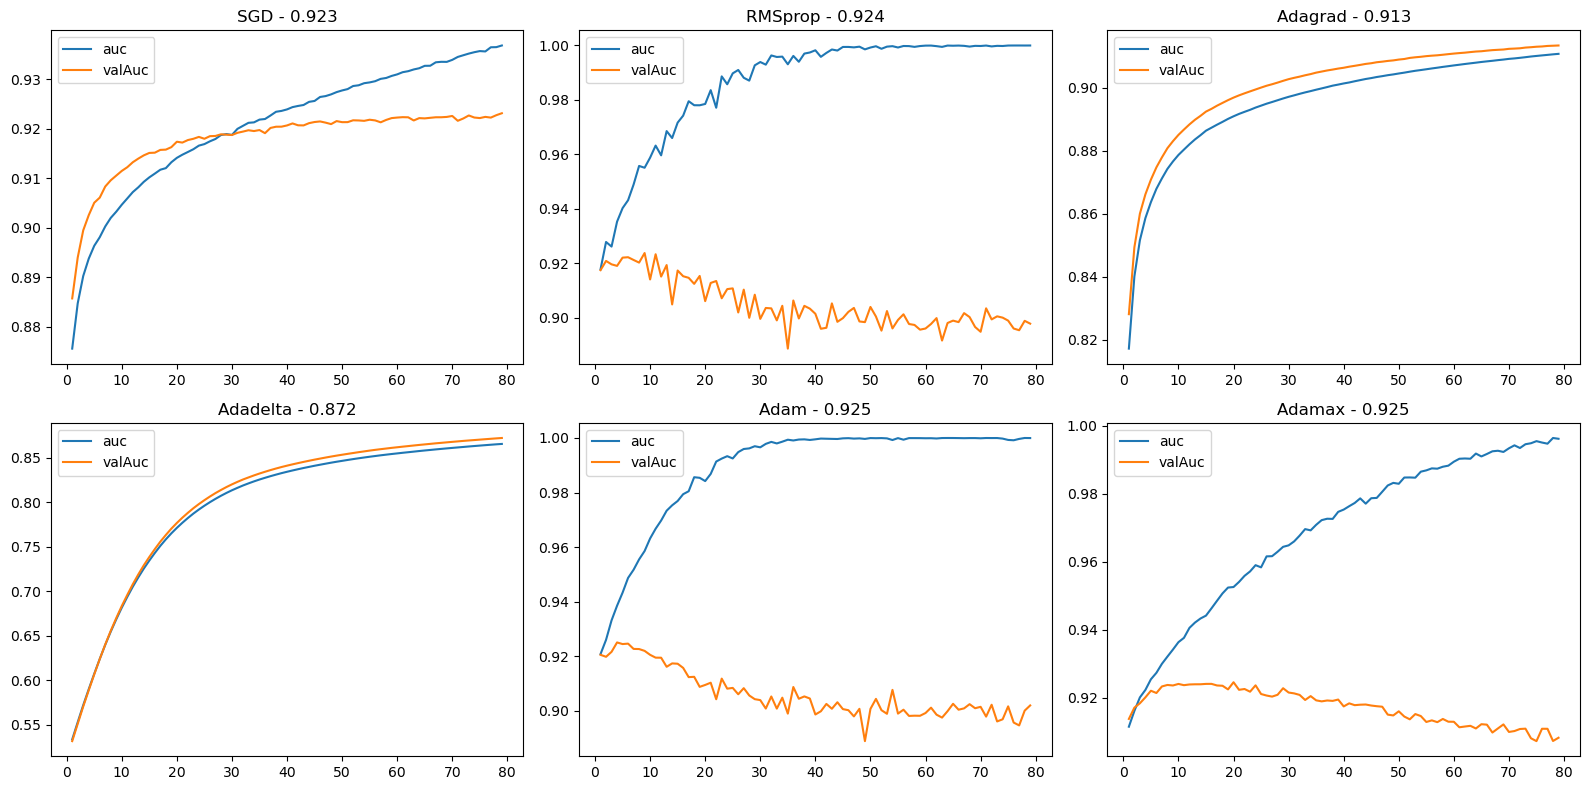

In [16]:
fig, ax = plt.subplots(2, 3, figsize=(16,8))
ax = ax.flatten()

# konfiguracja 2.
n = 2
nu1 = 400
nu2 = 100
nu3 = 10

for i, opt in enumerate(opti):
    score, bestTrainProba, bestTestProba, history = net(X_train, X_valid, features, target, n=n, nu1=nu1, nu2=nu2, nu3=nu3,
                                    epochs = 80, batchSize=100, optimizer=opt, debug=False)
    print(opt, score)
    history = pd.DataFrame(history)
    history.loc[1:, ["auc", "valAuc"]].plot(ax = ax[i])
    ax[i].set_title(opt+ " - " + str(round(score, 3)))
    gc.collect()

plt.tight_layout()
fig.savefig(f"imgNets/opti_{n}_{nu1}_{nu2}_{nu3}.png")
plt.show()

SGD 0.9229709036317354
RMSprop 0.9235811756560648
Adagrad 0.9153111225071471
Adadelta 0.8637550271895588
Adam 0.9217927371013206
Adamax 0.9241152754324116


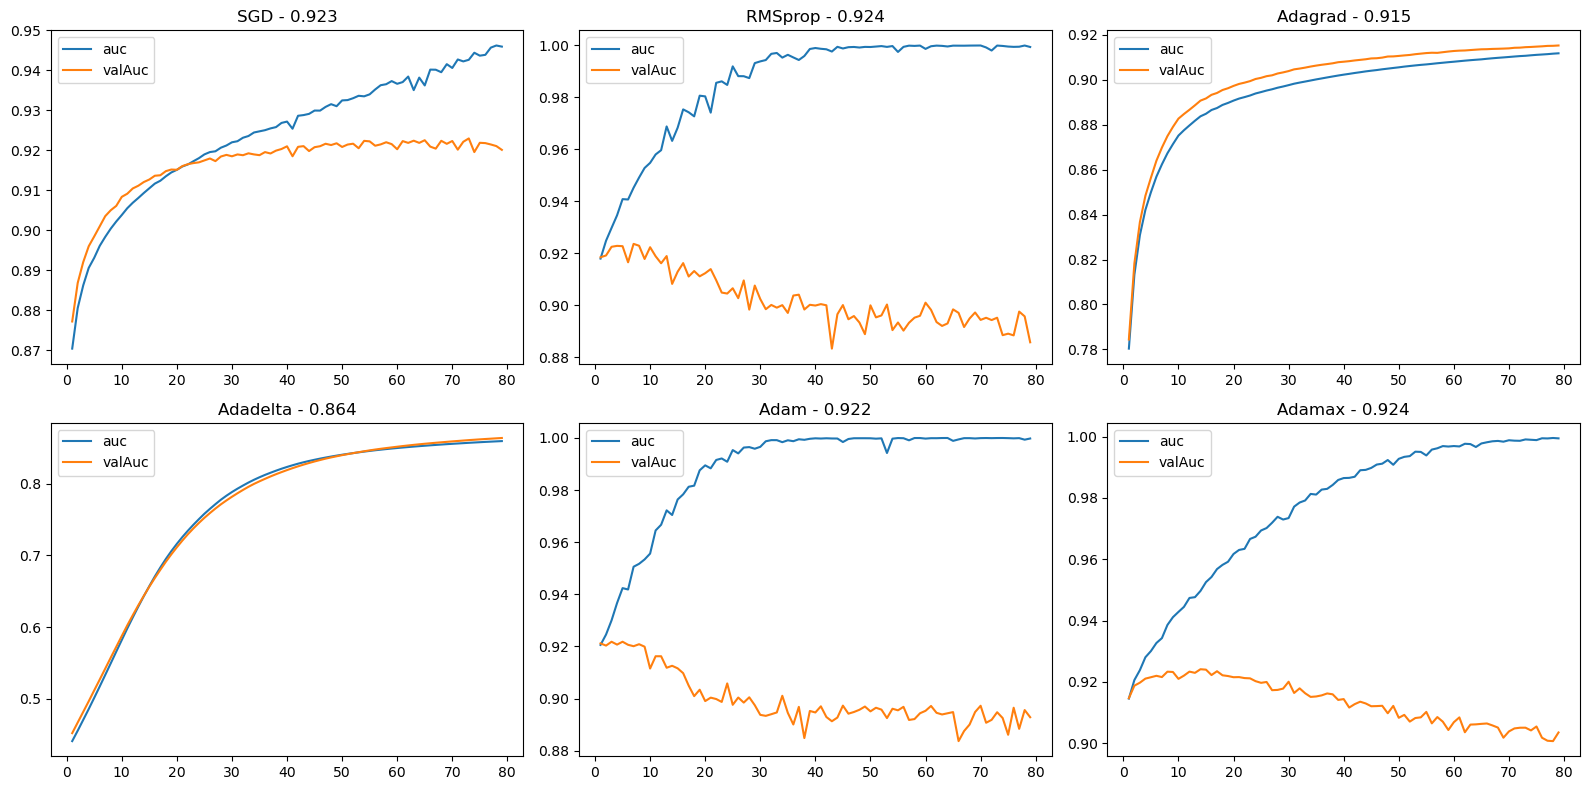

In [17]:
fig, ax = plt.subplots(2, 3, figsize=(16,8))
ax = ax.flatten()

# konfiguracja 2.
n = 3
nu1 = 400
nu2 = 100
nu3 = 10

for i, opt in enumerate(opti):
    score, bestTrainProba, bestTestProba, history = net(X_train, X_valid, features, target, n=n, nu1=nu1, nu2=nu2, nu3=nu3,
                                    epochs = 80, batchSize=100, optimizer=opt, debug=False)
    print(opt, score)
    history = pd.DataFrame(history)
    history.loc[1:, ["auc", "valAuc"]].plot(ax = ax[i])
    ax[i].set_title(opt+ " - " + str(round(score, 3)))
    gc.collect()

plt.tight_layout()
fig.savefig(f"imgNets/opti_{n}_{nu1}_{nu2}_{nu3}.png")
plt.show()

Zachowanie optymalizatorów możemy dalej kontrolować poprzez learning rate. Zmniejszająć learning rate spowodujemy, że zmiany sieci będą postępowały wolniej. W większości przypadków ręczna zmiana learning rate nie będzie potrzebna.

### 5.5.2 Batch size
Kiedy wykorzystujemy SGD dwa najważniejsze parametry to Batch size i learning rate. Kiedy korzystamy z innych optymalizatorów, np Adama jedynym parametrem, który powinniśmy ustawić jest w zasadzie batch size. Obecnie Adam jest prawdopodobnie, obok SGD, najcześciej wykorzystywanym.

Zobaczmy teraz jak wielkość próbki (batch size), która będzie brana na potrzeby aktualizacji jednego gradientu. Zauwazmy jak inaczej wpływa batchSize na SGD oraz Adam.

SGD 50 0.9194998809138094
SGD 100 0.9207436700146694
SGD 200 0.9156798247966773
SGD 500 0.902560674950488
Adam 50 0.922855035986917
Adam 100 0.9239350368738052
Adam 200 0.924046613124371
Adam 500 0.923578493534657


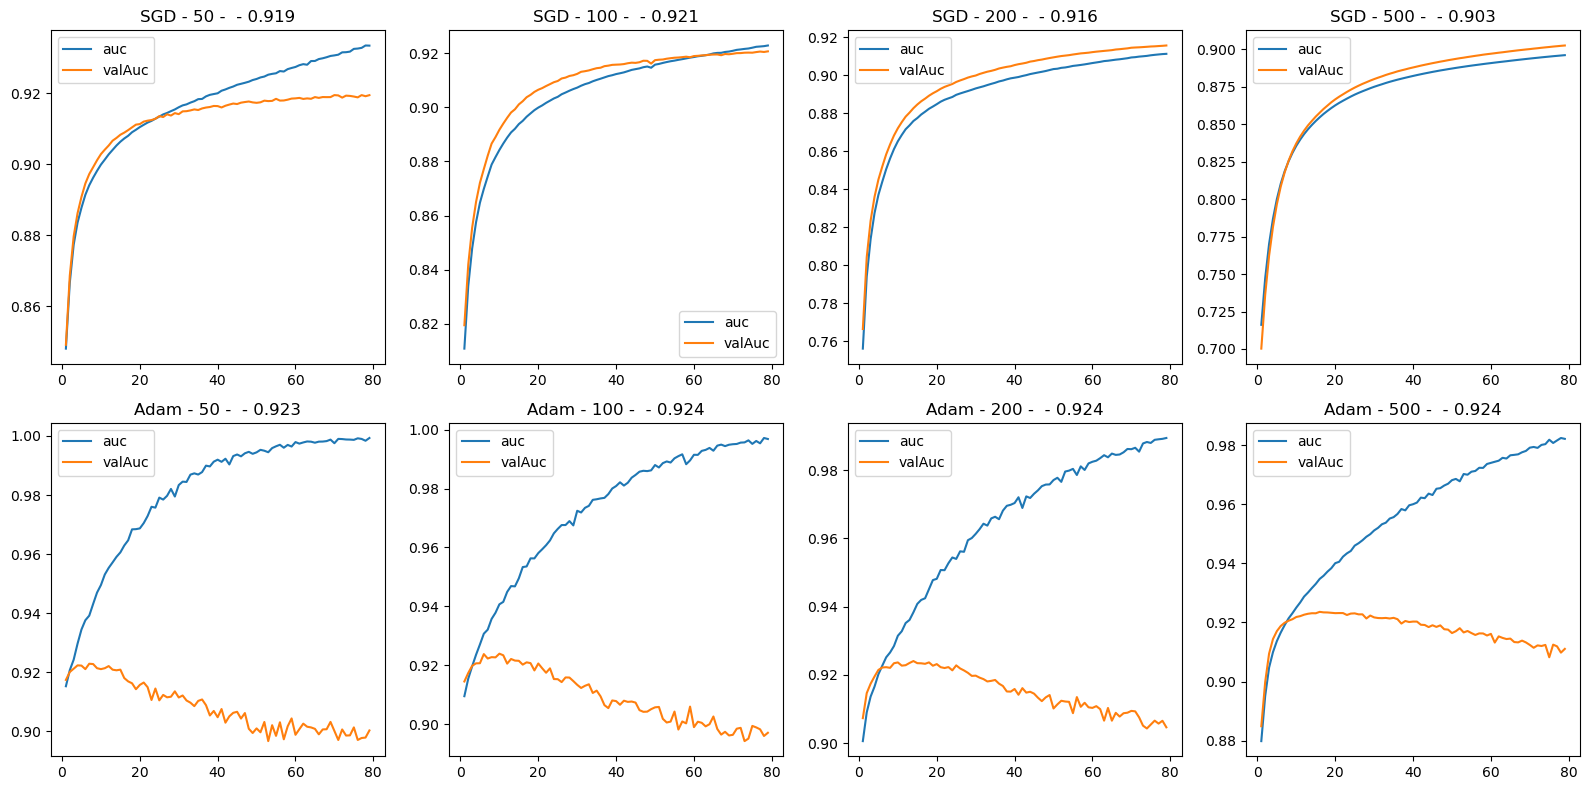

In [18]:
opti = ["SGD", "Adam"]
batchSizes = [50, 100, 200, 500]

fig, ax = plt.subplots(2, 4, figsize=(16,8))

n = 2
nu1 = 100
nu2 = 40
nu3 = 10

for i, opt in enumerate(opti):
    for j, batch in enumerate(batchSizes):
        score, bestTrainProba, bestTestProba, history = net(X_train, X_valid, features, target, n=n, nu1=nu1, nu2=nu2, nu3=nu3,
                                    epochs = 80, batchSize=batch, optimizer=opt, debug=False)
        print(opt, batch, score)
        history = pd.DataFrame(history)
        history.loc[1:, ["auc", "valAuc"]].plot(ax = ax[i, j])
        ax[i, j].set_title(opt+ " - " + str(batch) + " - "+ " - " + str(round(score, 3)))
        gc.collect()

plt.tight_layout()
fig.savefig(f"imgNets/batchSize_{n}_{nu1}_{nu2}_{nu3}.png")
plt.show()

### 5.5.3 Funkcje aktywacji
Dobór odpowiedniej funkcji aktywacji jest kluczowy dla dobrze działającej sieci. Zależy nam na tym, aby funkcja aktywacji pozwoliła sieci na aproksymację dowolnych, w tym nieliniowych, zależności. Jednocześnie aproksymacja funkcji powinna być możliwie łatwa, tzn. nie powinna wymagać rozbudowanej sieci, gdyż potencjalnie grozi to przetrenowaniem.
![distances](img/activations.png)
Źródło: Wikipedia, https://en.wikipedia.org/wiki/Activation_function

Zobaczmy jak to wygląda w praktyce. Funkcje aktywacyjną będzie wybierać jedną dla całej sieci (w praktyce moglibyśmy robić to dla każdej sieci z osobna). Jak przy optimizerze sprawdzimy różnej konfiguracje/architektury sieci.

In [19]:
# Lista sprawdzanych funkcji
activations = ["tanh", "sigmoid", "linear", "relu", "selu", "prelu"]

tanh 0.9277338148277685
sigmoid 0.9148061684500987
linear 0.9120518085723462
relu 0.9239046394978496
selu 0.9247847329358072
prelu 0.9247475408522853


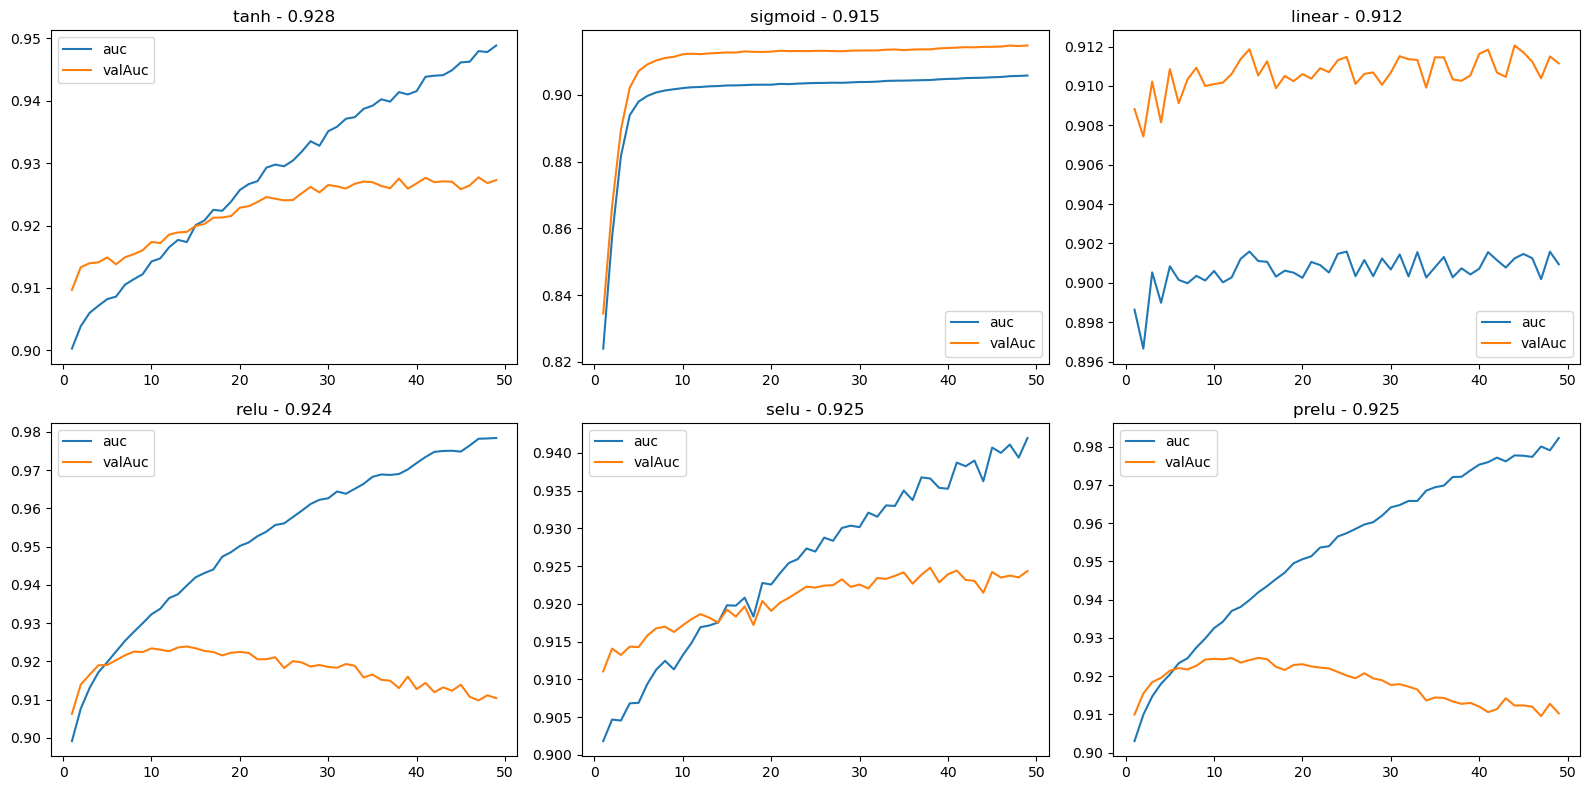

In [20]:
fig, ax = plt.subplots(2, 3, figsize=(16,8))
ax = ax.flatten()

# Konfiguracja 1.
n = 2
nu1 = 100
nu2 = 40
nu3 = 10

for i, acti in enumerate(activations):
    score, bestTrainProba, bestTestProba, history = net(X_train, X_valid, features, target, n=n, nu1=nu1, nu2=nu2, nu3=nu3,
                                    epochs = 50, batchSize=200, optimizer="Adam", activation=acti, debug=False)
    print(acti, score)
    history = pd.DataFrame(history)
    history.loc[1:, ["auc", "valAuc"]].plot(ax = ax[i])
    ax[i].set_title(str(acti)+ " - " + str(round(score, 3)))
    gc.collect()

plt.tight_layout()
fig.savefig(f"imgNets/activations_{n}_{nu1}_{nu2}_{nu3}.png")
plt.show()

tanh 0.9195828478693585
sigmoid 0.9035308876677488
linear 0.9119904773961536
relu 0.9240155005160401
selu 0.9194709140026049
prelu 0.9210333391267156


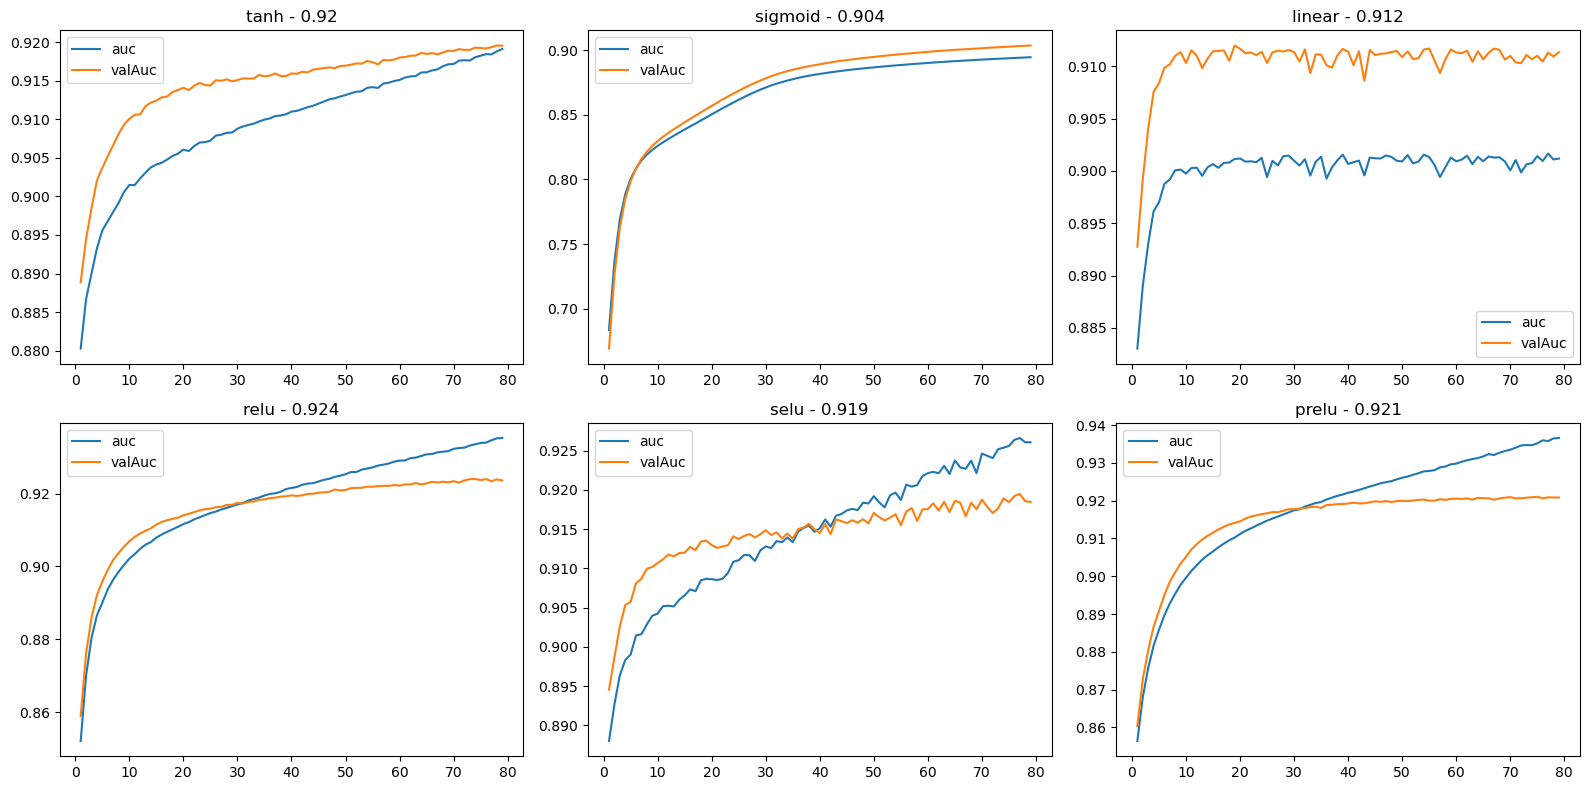

In [21]:
fig, ax = plt.subplots(2, 3, figsize=(16,8))
ax = ax.flatten()

# Konfiguracja 1.
n = 2
nu1 = 100
nu2 = 40
nu3 = 10

for i, acti in enumerate(activations):
    score, bestTrainProba, bestTestProba, history = net(X_train, X_valid, features, target, n=n, nu1=nu1, nu2=nu2, nu3=nu3,
                                    epochs = 80, batchSize=50, optimizer="SGD", activation=acti, debug=False)
    print(acti, score)
    history = pd.DataFrame(history)
    history.loc[1:, ["auc", "valAuc"]].plot(ax = ax[i])
    ax[i].set_title(str(acti)+ " - " + str(round(score, 3)))
    gc.collect()

plt.tight_layout()
fig.savefig(f"imgNets/activations_{n}_{nu1}_{nu2}_{nu3}_SGD.png")
plt.show()

tanh 0.9255571839012636
sigmoid 0.9144143999164609
linear 0.9120707622302948
relu 0.9252596472330878
selu 0.9245733817688697
prelu 0.9232720164617882


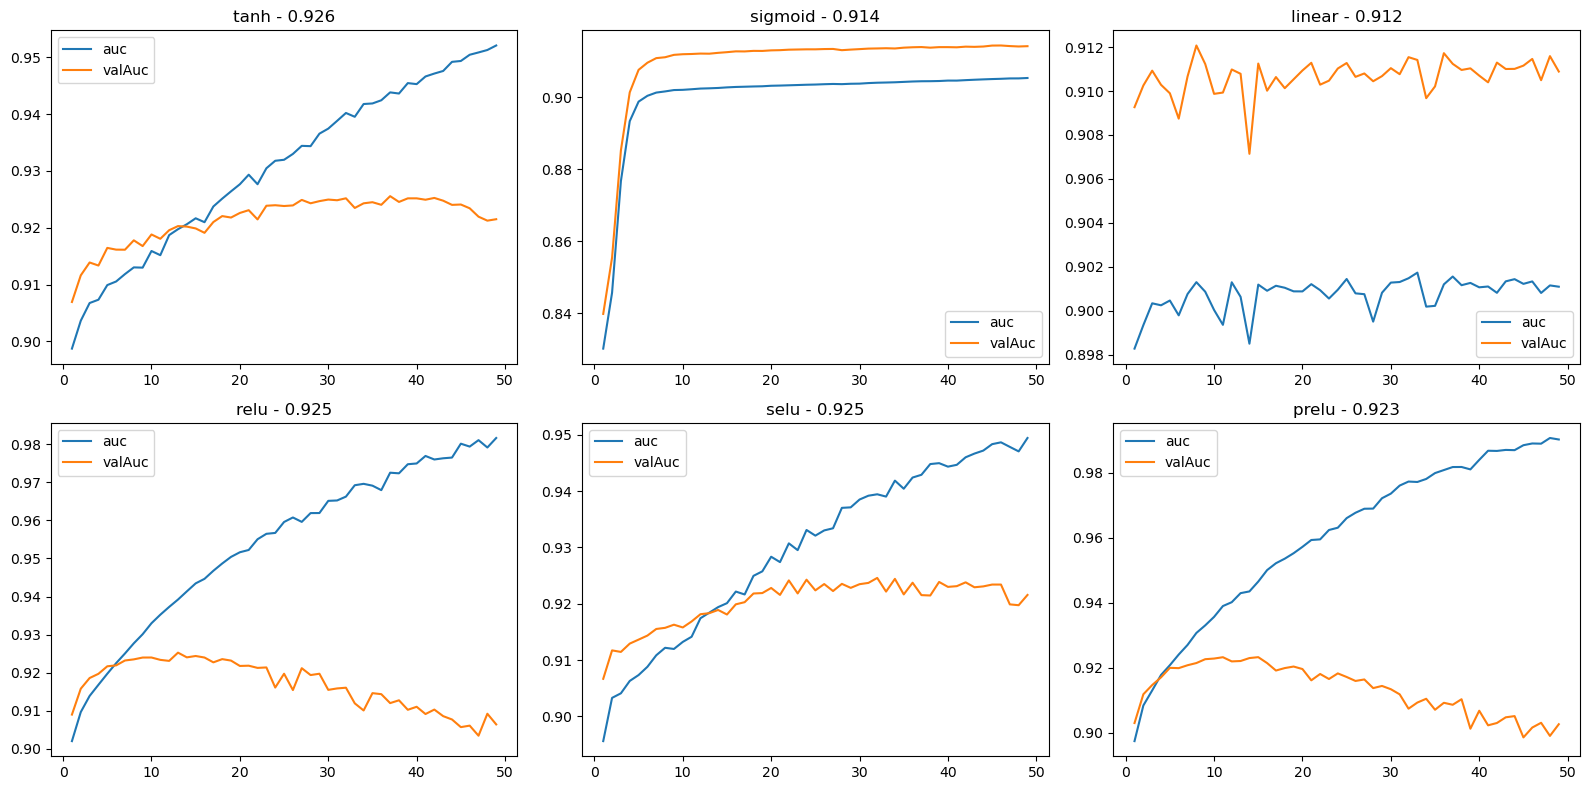

In [22]:
fig, ax = plt.subplots(2, 3, figsize=(16,8))
ax = ax.flatten()

# Konfiguracja 2.
n = 3
nu1 = 100
nu2 = 40
nu3 = 10

for i, acti in enumerate(activations):
    score, bestTrainProba, bestTestProba, history = net(X_train, X_valid, features, target, n=n, nu1=nu1, nu2=nu2, nu3=nu3,
                                    epochs = 50, batchSize=200, optimizer="Adam", activation=acti, debug=False)
    print(acti, score)
    history = pd.DataFrame(history)
    history.loc[1:, ["auc", "valAuc"]].plot(ax = ax[i])
    ax[i].set_title(str(acti)+ " - " + str(round(score, 3)))
    gc.collect()

plt.tight_layout()
fig.savefig(f"imgNets/activations_{n}_{nu1}_{nu2}_{nu3}.png")
plt.show()

Widzimy jak zupełnie inaczej zachowują się funkcje aktywacji z rodziny relu od liniowej, tanh oraz sigmoidu. Chociaż funkcja aktyacji ReLu jest bardzo prosta w swojej konstrukcji to umożliwia niemalże dowolne nieliniowe transformacje. Widzimy również, że w naszym zbiorze danych, nie mamy praktycznie żadnej korzyści z budowanie bardziej złożonej i skomplikowanej struktury sieci. Kiedy dodaliśmy trzecią warstwę nie widzieliśmy praktycznie żadnych korzyści, a proces uczenia się w przypadku niektórych funkcji aktywacji bardzo się utrudnił (sigmoid).

### 5.5.4 Regularyzacja
Regularyzacja może być pomocna w każdym algorytmie, w którym liczba parametrów jest wysoka. Możemy stosować będziemy jedną z trzech form regularyzacji, $L_1$, $L_2$ lub kombinacji $L_1$ i $L_2$.
$$R_{L_1} = \alpha \sum_{i=0}^{k} |\beta_i|$$
$$R_{L_2} = \lambda \sum_{i=0}^{k} |\beta_i|^2$$
Zwykle stosowana jest regularyzacja $L_2$, ze względu na malejące krańcowe koszty, dzięki którym pojedyncze parametry nie są zwykle redukowane do zera. Sprawdźmy jak to zadziała w naszym problemie.

0 0.9237855533073418
0.001 0.9254406010240697
0.05 0.9278874109803905
0.1 0.9279550004398679
0.2 0.927018403644252
0.5 0.9169354152317318


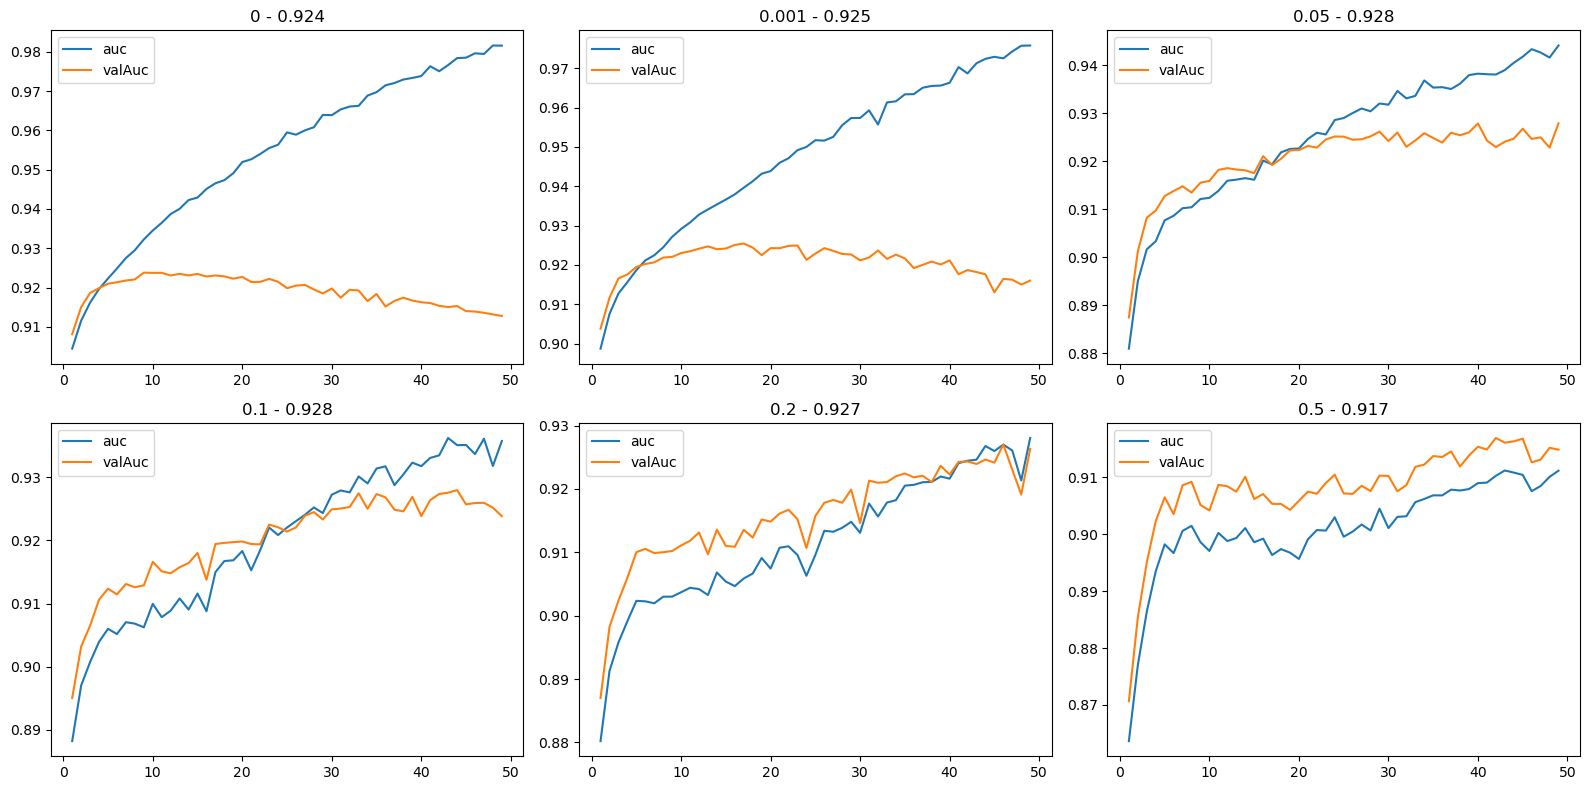

In [23]:
reguRates = [0, 0.001, 0.05, 0.1, 0.2, 0.5]

fig, ax = plt.subplots(2, 3, figsize=(16,8))
ax = ax.flatten()
n = 2
nu1 = 100
nu2 = 40
nu3 = 10

for i, reguRate in enumerate(reguRates):
    score, bestTrainProba, bestTestProba, history = net(X_train, X_valid, features, target, n=n, nu1=nu1, nu2=nu2, nu3=nu3,
                                    epochs = 50, batchSize=200, optimizer="Adam", activation="prelu",
                                     regu=reguRate, debug=False)
    print(reguRate, score)
    history = pd.DataFrame(history)
    history.loc[1:, ["auc", "valAuc"]].plot(ax = ax[i])
    ax[i].set_title(str(reguRate)+ " - " + str(round(score, 3)))
    gc.collect()

plt.tight_layout()
fig.savefig(f"imgNets/reguRate_{n}_{nu1}_{nu2}_{nu3}.png")
plt.show()

Jak widać wprowadzenie regularyzacji minimalnie pomogło w naszej sieci. Warto zwrócić jednak uwage na to jak zupełnie inaczej przebiega proces uczenia wraz ze wzrostem siły regularyzacji. Regularyzacja stanowi w pewnym sensie sztuczne ograniczenie. Chociaż w niektórych sytuacjach jest skuteczna warto popatrzeć na innę metodę - dropout.

### 5.5.5 Dropout
Inną techniką regularyzacji, która zwykle przynosi lepsze rezultaty niż regularyzacja $L_1$ czy $L_2$ jest dropout. Zasada ta polega na tym aby w trakcie trenowania sieci wyłączać (zerować) losowo wybrane neurony (połączenia). Ta pozornie destruktywna interwencja powoduje, że sieci zwykle lepiej uogólniają tworzony estymator. Sieć "nie może polegać" na pojedynczych połączeniach, co oznacza, że najważniejsze elementy funkcji należy "przeprowadzić więcej niż jedną ścieżką". Dzięki temu dochodzi do pewnego uśrednia estymatora. Kiedy będziemy przeprowadzać eksperymenty z dropoutem, na początek sprawdzimy wersję bez regularyzacji.

In [24]:
# Sprawdzane poziomy dropout
dropRates = [0, 0.2, 0.4, 0.5, 0.6, 0.8]

0 0.923349261558334
0.2 0.9246599248862959
0.4 0.9248394482125271
0.5 0.9263611050912386
0.6 0.9226604927808019
0.8 0.9214331540245768


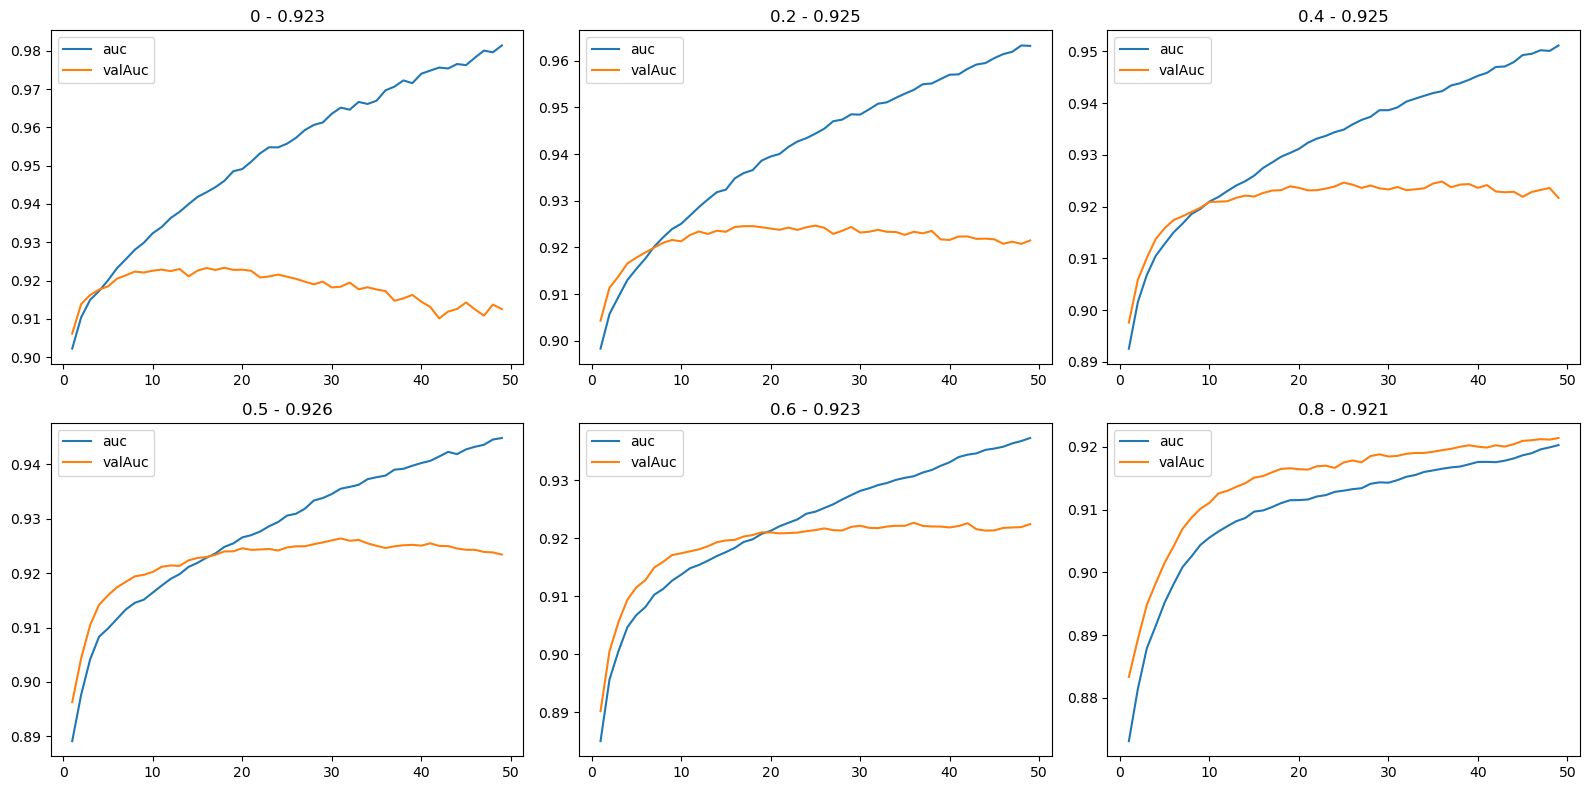

In [25]:
fig, ax = plt.subplots(2, 3, figsize=(16,8))
ax = ax.flatten()
n = 2
nu1 = 100
nu2 = 40
nu3 = 10

for i, dropRate in enumerate(dropRates):
    score, bestTrainProba, bestTestProba, history = net(X_train, X_valid, features, target, n=n, nu1=nu1, nu2=nu2, nu3=nu3,
                                    epochs = 50, batchSize=200, optimizer="Adam", activation="prelu",
                                     dropout_rate=dropRate, debug=False)
    print(dropRate, score)
    history = pd.DataFrame(history)
    history.loc[1:, ["auc", "valAuc"]].plot(ax = ax[i])
    ax[i].set_title(str(dropRate)+ " - " + str(round(score, 3)))
    gc.collect()

plt.tight_layout()
fig.savefig(f"imgNets/dropRate_{n}_{nu1}_{nu2}_{nu3}.png")
plt.show()

Zauważmy, zę dla dropout rate na poziomie 0.5 dostaliśmy w zasadzie tak samo dobry wynik jak przy regularyzacji, z tym, że proces szkolenia dalej przebiega stopniowo (krzywe są gładkie). Zobaczmy co się stanie jeżeli uruchomimy teraz dropout w każdej warstwie, a nie wyłącznie na poczatku.

0 0.9231618706759732
0.2 0.9251659517919075
0.4 0.9265434893469713
0.5 0.9270144698661871
0.6 0.9262473831435464
0.8 0.9188261320161613


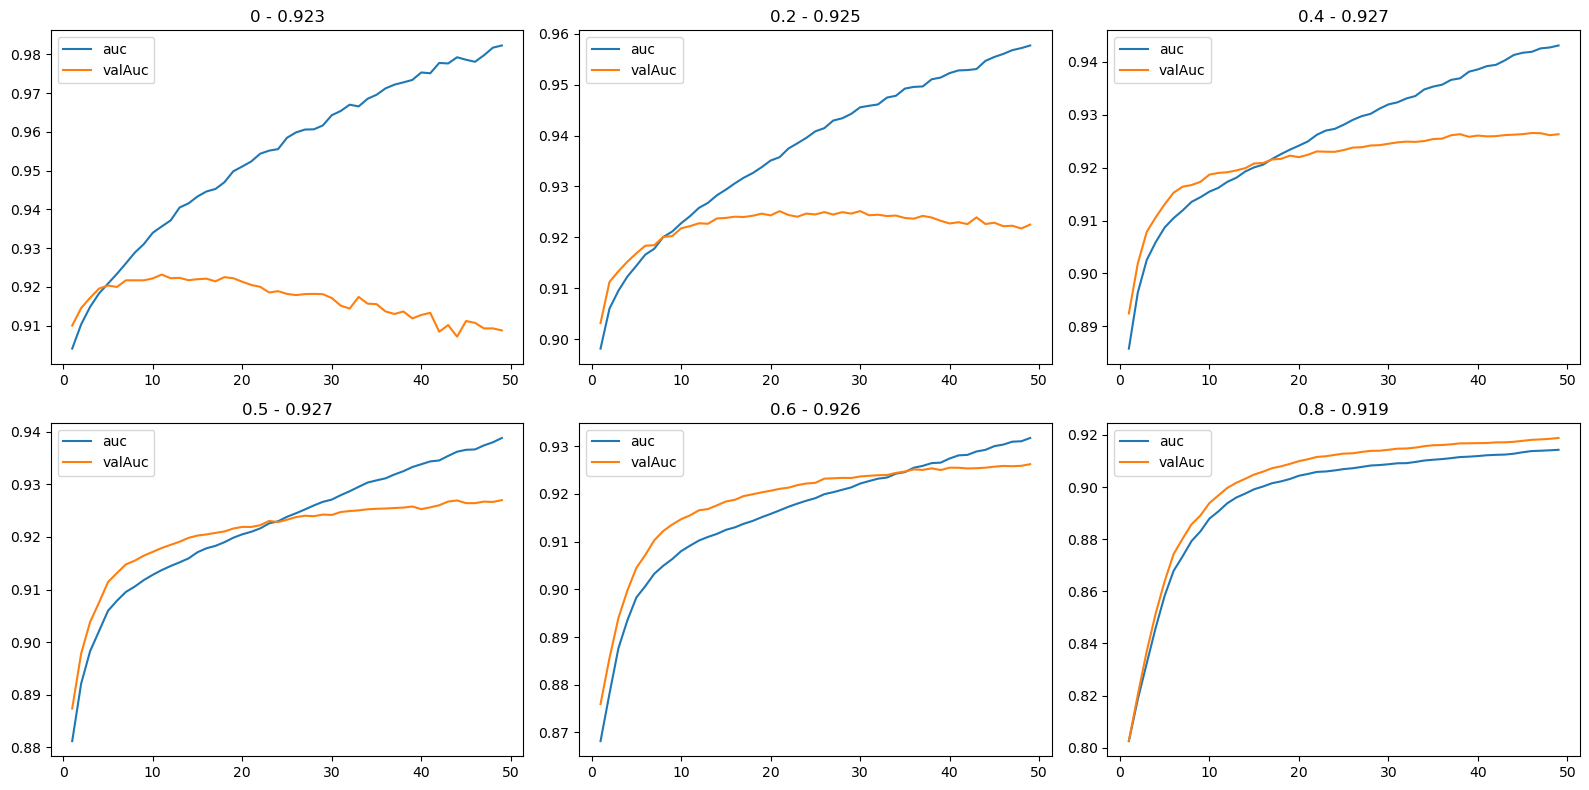

In [26]:
fig, ax = plt.subplots(2, 3, figsize=(16,8))
ax = ax.flatten()
n = 2
nu1 = 100
nu2 = 40
nu3 = 10

for i, dropRate in enumerate(dropRates):
    score, bestTrainProba, bestTestProba, history = net(X_train, X_valid, features, target, n=n, nu1=nu1, nu2=nu2, nu3=nu3,
                                    epochs = 50, batchSize=200, optimizer="Adam", activation="prelu",
                                     dropout_rate=dropRate, dropout_all_layers=True, debug=False)
    print(dropRate, score)
    history = pd.DataFrame(history)
    history.loc[1:, ["auc", "valAuc"]].plot(ax = ax[i])
    ax[i].set_title(str(dropRate)+ " - " + str(round(score, 3)))
    gc.collect()

plt.tight_layout()
fig.savefig(f"imgNets/dropRateAll_{n}_{nu1}_{nu2}_{nu3}.png")
plt.show()

Jak widać wyniki są minimalnie różne. Chociaż różnica jest kosmetyczna, to widać, że w przypadku sieci neuronowych nie możemy po prostu włączać wszystkiego i liczyć na dobre efekty. Kiedy chcemy maksymalizować skuteczność musimy budować sieć powoli i z namysłem. Zobaczmy czy uruchamianie dropoutu we wszystkich warstawach będzie pomocne, jeżeli zdecydujemy się na większą sieć (więcej warstw i więcej neuronów)

0 0.9229794864202405
0.2 0.9247432494580327
0.4 0.9265474231250361
0.5 0.925241766423702
0.6 0.9248669846589809
0.8 0.9222520950944357


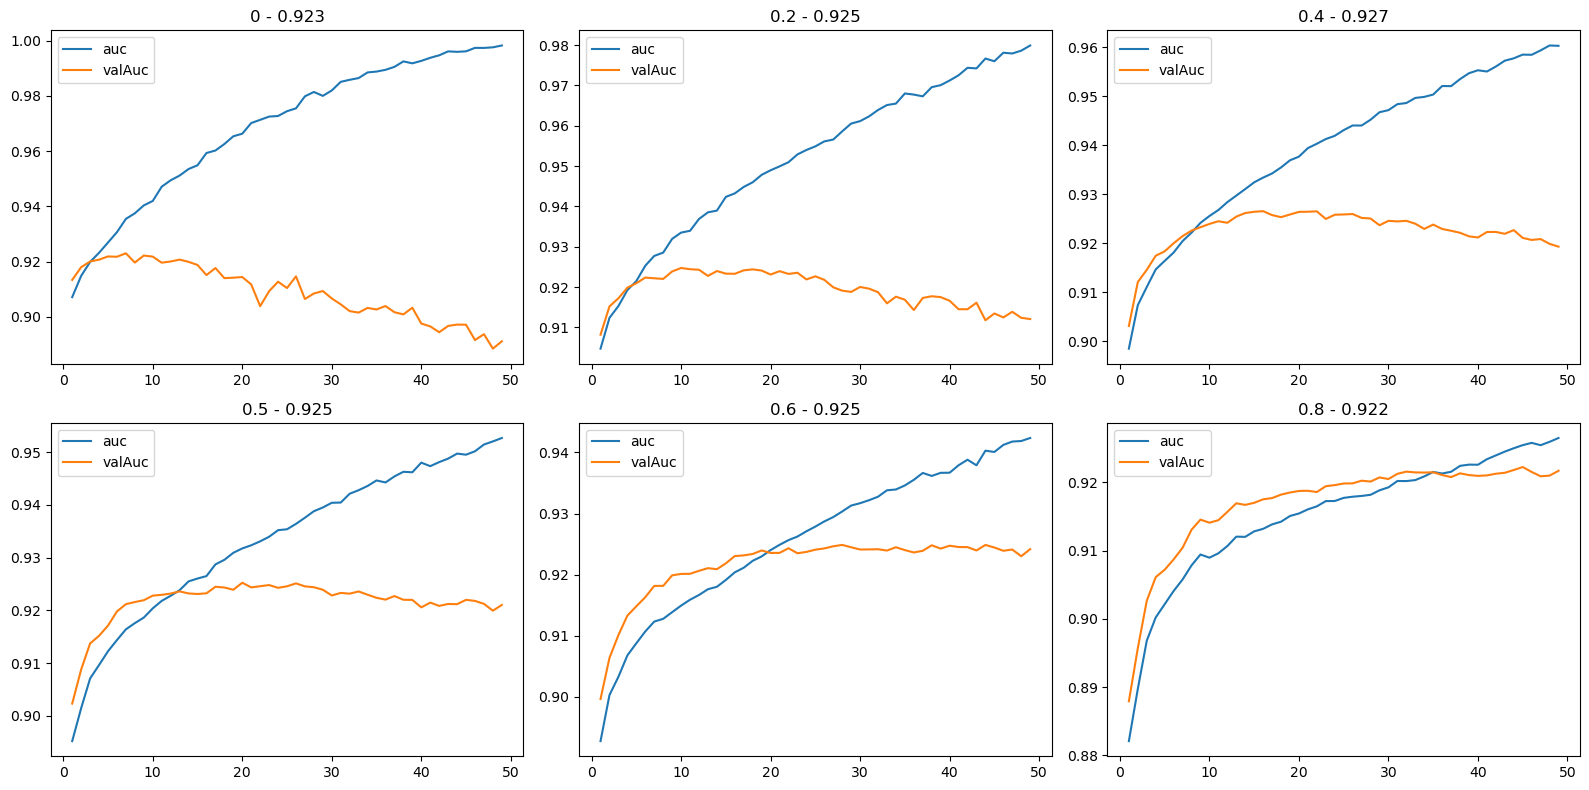

In [27]:
fig, ax = plt.subplots(2, 3, figsize=(16,8))
ax = ax.flatten()
n = 3
nu1 = 150
nu2 = 60
nu3 = 20

for i, dropRate in enumerate(dropRates):
    score, bestTrainProba, bestTestProba, history = net(X_train, X_valid, features, target, n=n, nu1=nu1, nu2=nu2, nu3=nu3,
                                    epochs = 50, batchSize=200, optimizer="Adam", activation="prelu",
                                     dropout_rate=dropRate, dropout_all_layers=False, debug=False)
    print(dropRate, score)
    history = pd.DataFrame(history)
    history.loc[1:, ["auc", "valAuc"]].plot(ax = ax[i])
    ax[i].set_title(str(dropRate)+ " - " + str(round(score, 3)))
    gc.collect()

plt.tight_layout()
fig.savefig(f"imgNets/dropRate_{n}_{nu1}_{nu2}_{nu3}.png")
plt.show()

0 0.9252063624211189
0.2 0.924870560820858
0.4 0.92605462801837
0.5 0.9259215947965416
0.6 0.924583037405938
0.8 0.9161093218381184


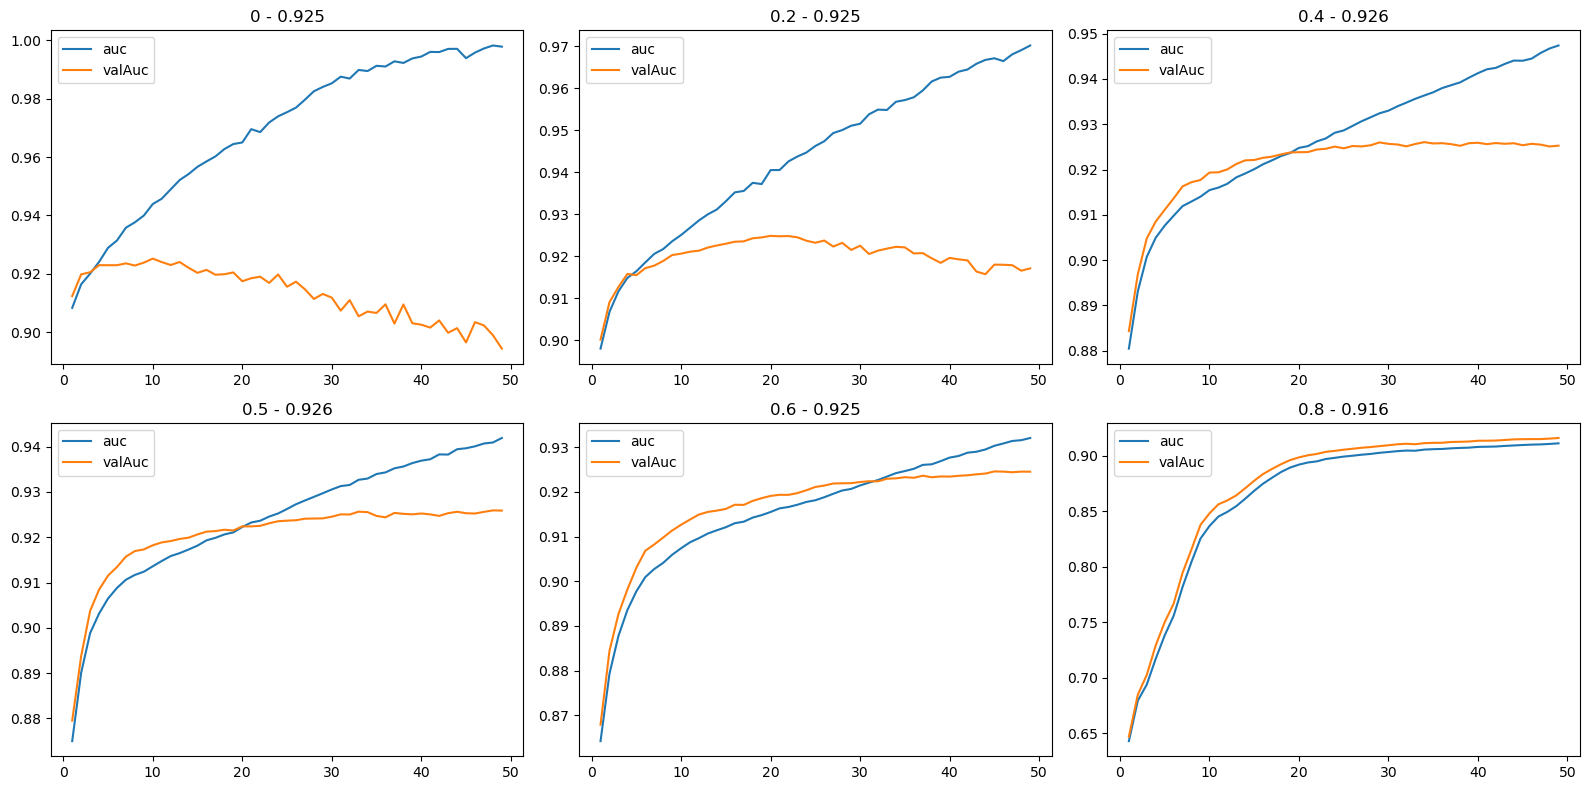

In [28]:
fig, ax = plt.subplots(2, 3, figsize=(16,8))
ax = ax.flatten()
n = 3
nu1 = 150
nu2 = 60
nu3 = 20

for i, dropRate in enumerate(dropRates):
    score, bestTrainProba, bestTestProba, history = net(X_train, X_valid, features, target, n=n, nu1=nu1, nu2=nu2, nu3=nu3,
                                    epochs = 50, batchSize=200, optimizer="Adam", activation="prelu",
                                     dropout_rate=dropRate, dropout_all_layers=True, debug=False)
    print(dropRate, score)
    history = pd.DataFrame(history)
    history.loc[1:, ["auc", "valAuc"]].plot(ax = ax[i])
    ax[i].set_title(str(dropRate)+ " - " + str(round(score, 3)))
    gc.collect()

plt.tight_layout()
fig.savefig(f"imgNets/dropRateAll_{n}_{nu1}_{nu2}_{nu3}.png")
plt.show()

Na koniec możemy zobaczyć, czy włączenie jednocześnie regularyzacji oraz droputu przyniesie jeszcze lepsze rezultaty.

0 0.9280479806486729
0.2 0.9279714507845027
0.4 0.9267709332423557
0.5 0.9264651714018626
0.6 0.9251267928193531
0.8 0.917996820076859


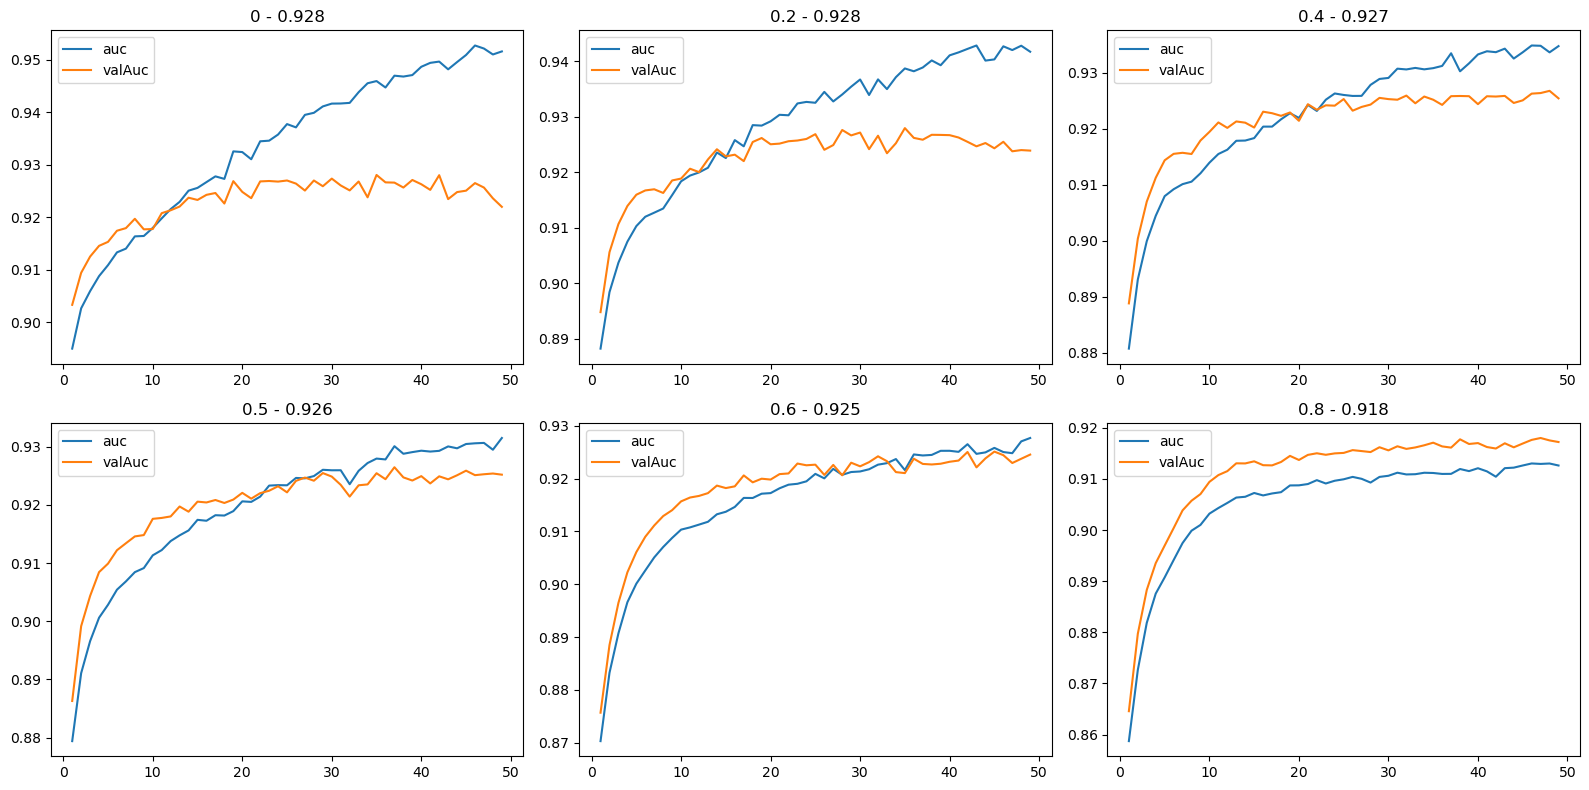

In [30]:
dropRates = [0, 0.2, 0.4, 0.5, 0.6, 0.8]

fig, ax = plt.subplots(2, 3, figsize=(16,8))
ax = ax.flatten()
n = 2
nu1 = 100
nu2 = 40
nu3 = 20

for i, dropRate in enumerate(dropRates):
    score, bestTrainProba, bestTestProba, history = net(X_train, X_valid, features, target, n=n, nu1=nu1, nu2=nu2, nu3=nu3,
                                    epochs = 50, batchSize=200, optimizer="Adam", activation="prelu",
                                    regu=0.025,
                                     dropout_rate=dropRate, dropout_all_layers=False, debug=False)
    print(dropRate, score)
    history = pd.DataFrame(history)
    history.loc[1:, ["auc", "valAuc"]].plot(ax = ax[i])
    ax[i].set_title(str(dropRate)+ " - " + str(round(score, 3)))
    gc.collect()

plt.tight_layout()
fig.savefig(f"imgNets/dropRateAll_{n}_{nu1}_{nu2}_{nu3}.png")
plt.show()

Powyższe wyniki po raz kolejny pokazują, że więcej wcale nie musi znaczyć lepiej. Jednocześnie silny dropout może nam pomóc, jeżeli za wszeką cenę chcemy uniknąć nadmiernego przetrenowania, nawet jeżeli za cenę minimalnego spadku skuteczności modelu. Chociaż w większości przypadków może być tak, że droput będzie działał lepiej niż regularyzacja, to w innych przypadkach regularyzacja mozę okazywać się lepszym rozwiązaniem.

## Batch normalization
Ostatnim ważnym elementem sieci jest batch normalization. Jak pisaliśmy, w przypadku głebokich, wielowarstwowych sieci neuronowych zdarzają się problemy "umierających gradientów". W drodze optymalizacji wynik funkcji aktywacji może przyjąć wartości, które spowodują, że drobna zmiana parametrów nie zmieni wyniku funkcji aktywacji (np. dla mocno ujemnych wartości w ReLU). Odpowiedzią na ten problem jest normalizacja wyników każdej warstwy tak, aby średnia dla wszystkich obserwacji wynosiła zero.

## 5.6 Walidacja krzyżowa sieci
Zobaczmy jak tak naprawdę spisze się nasza sieć. Przetestujmy różne jej konfiguracjew walidacji krzyżowej. Przygotujmy nasz wrapper do walidacji krzyżowej wzorując się na wrapperze XGB.

In [31]:
# Przygotujmy prosty wrapper
def CVTestNN(nFolds = 5, randomState=2020, features=features, debug=False, *args, **kwargs):
    
    # Przygotujmy walidację krzyżową
    kf = KFold(n_splits=nFolds, shuffle=True, random_state=randomState)

    # Zapamiętujemy wyniki zbioru treningowego i testowego
    testResults = []
    trainResults = []
    
    # Przechowajmy również predykcje dla poszczególnych foldów
    predictions = []
    
    # Razem z informacją o tym, jaki był ich indeks w oryginalnym zbiorze danych
    indices = []
    
    # Przygotujmy listę historii
    hists = []
    fold = 1
    for train, test in kf.split(df.index.values):
        # Przygotowanie estymatora
        score, trainPred, testPred, history = net(df.iloc[train], df.iloc[test], features, target,
                                                            debug=False, *args, **kwargs)

        # Zachowajmy informacje o predykcjach dla tego foldu
        predictions.append(testPred.copy())
        
        # Razem z indeksami w oryginalnym data frame
        indices.append(df.iloc[test].index.tolist().copy())
        
        # Informowanie o każdym foldzie razem z wynikami treningowymi możemy opcjonalnie wyświetlać w trakcie
        trainScore = roc_auc_score(df[target].iloc[train], trainPred)
        testScore = roc_auc_score(df[target].iloc[test], testPred)
        
        trainResults.append(trainScore)
        testResults.append(testScore)
        
        
        hists.append(history)
        fold+=1
        
        if debug:
            print("Train AUC:", trainScore,
                  "Valid AUC:", testScore)
        
    return trainResults, testResults, predictions, indices, hists

In [32]:
trainResults, testResults, predictions, indices, hists = CVTestNN(features=features, n=2, nu1=100, nu2=40, nu3=10,
                                    epochs = 50, batchSize=200, optimizer="Adam", activation="prelu",
                                     dropout_rate=0.2, dropout_all_layers=False, regu=0.025, debug=False)
print(np.mean(testResults))

modelNN = {
    "name":"NNet",
    "description":"Model NN",
    "specification":'features=features, n=2, nu1=100, nu2=40, nu3=10, epochs = 50, batchSize=200, optimizer="Adam", activation="prelu", dropout_rate=0.2, dropout_all_layers=False, regu=0.025, debug=False',
    "trainResults":trainResults.copy(),
    "testResults":testResults.copy(),
    "predictions":predictions.copy(),
    "indices":indices.copy(),
}

0.923362850902697


In [33]:
# Otwieramy plik do zapisu binarnego z wykorzystenim with
with open("model_NN_1.p", "wb") as fp:
    # Zapisujemy obiekt do wskaźnika pliku
    pickle.dump(modelNN, fp)

In [34]:
# Wczytajmy też wcześniej zapisane modele
with open("results_past/model_ekonometria_1.p", "rb") as fp:
    modelEkonometria = pickle.load(fp)
    
with open("results_past/model_svm_1.p", "rb") as fp:
    modelSVM = pickle.load(fp)
    
with open("results_past/model_kNN_1.p", "rb") as fp:
    modelkNN = pickle.load(fp)
    
with open("results_past/model_RF_1.p", "rb") as fp:
    modelRF = pickle.load(fp)
    
with open("results_past/model_XGB_1.p", "rb") as fp:
    modelXGB = pickle.load(fp)

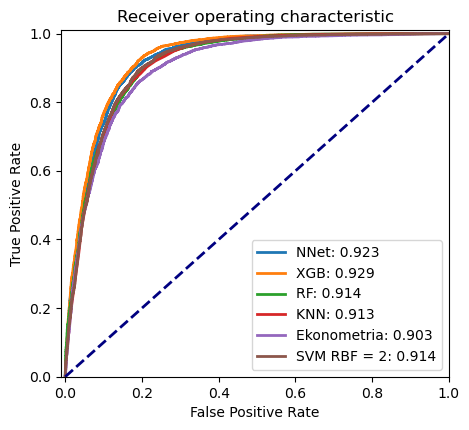

In [35]:
from helpers2 import plotROCs
res2plot = []
true = df[target].sort_index()
for result in [modelNN, modelXGB, modelRF, modelkNN, modelEkonometria, modelSVM]:
    # Tworzymy wektor predykcji tworząc serię pandasa, a następnie sortujemy indeks
    pred = pd.Series(sum(result["predictions"], []), index=sum(result["indices"], [])).sort_index()
    res2plot.append((true, pred, result["name"]))
    
# Wywołujemy funkcję do rysowania
plotROCs(res2plot)

Udało nam się znaleźć bardzo przyzwoity model z wykorzystaniem sieci neuronowych. Chociaż wynik nie jest tak dobry, jak z użyciem XGB to jest to jedno z dwóch najlepszych rozwiązań. Pamiętajmy, że ze względu na to jak czasochłonne są obliczenia z wykorzystaniem sieci neuronowych, nie zrobiliśmy pełnego tuningu hiperparametrów w walidacji krzyzowej. Możliwe, że pomogłoby to nam jeszcze nieznacznie podnieść wynik. Na zakończenie możemy zobaczyć jak stabilne, dzięki stosowaniu early stoppingu, będą wyniki jakie możemy uzyskać przy różnych strukturach i parametrach.

In [38]:
## Sieci dwu warstwowe.
trainResults, testResults, predictions, indices, hists = CVTestNN(features=features, n=2, nu1=100, nu2=40, nu3=10,
                                    epochs = 50, batchSize=200, optimizer="Adam", activation="prelu",
                                     dropout_rate=0.2, dropout_all_layers=False, regu=0.025, debug=False)
print(np.mean(testResults))

trainResults, testResults, predictions, indices, hists = CVTestNN(features=features, n=2, nu1=100, nu2=40, nu3=10,
                                    epochs = 50, batchSize=200, optimizer="Adam", activation="prelu",
                                     dropout_rate=0.5, dropout_all_layers=False, regu=0, debug=False)
print(np.mean(testResults))


trainResults, testResults, predictions, indices, hists = CVTestNN(features=features, n=2, nu1=200, nu2=50, nu3=10,
                                    epochs = 50, batchSize=200, optimizer="Adam", activation="prelu",
                                     dropout_rate=0.2, dropout_all_layers=False, regu=0.025, debug=False)
print(np.mean(testResults))

trainResults, testResults, predictions, indices, hists = CVTestNN(features=features, n=2, nu1=200, nu2=50, nu3=10,
                                    epochs = 50, batchSize=200, optimizer="Adam", activation="prelu",
                                     dropout_rate=0.5, dropout_all_layers=False, regu=0, debug=False)
print(np.mean(testResults))


trainResults, testResults, predictions, indices, hists = CVTestNN(features=features, n=2, nu1=40, nu2=100, nu3=10,
                                    epochs = 50, batchSize=200, optimizer="Adam", activation="prelu",
                                     dropout_rate=0.2, dropout_all_layers=False, regu=0.025, debug=False)
print(np.mean(testResults))

trainResults, testResults, predictions, indices, hists = CVTestNN(features=features, n=2, nu1=40, nu2=100, nu3=10,
                                    epochs = 50, batchSize=200, optimizer="Adam", activation="prelu",
                                     dropout_rate=0.5, dropout_all_layers=False, regu=0, debug=False)
print(np.mean(testResults))

0.9238217216213427
0.9201581428844511
0.9233181472415222
0.9206525696033925
0.9246208186661355
0.9196598447307813


In [39]:
# Sieci trzy warstwowe.
trainResults, testResults, predictions, indices, hists = CVTestNN(features=features, n=2, nu1=100, nu2=40, nu3=10,
                                    epochs = 50, batchSize=200, optimizer="Adam", activation="prelu",
                                     dropout_rate=0.2, dropout_all_layers=False, regu=0.025, debug=False)
print(np.mean(testResults))

trainResults, testResults, predictions, indices, hists = CVTestNN(features=features, n=2, nu1=100, nu2=40, nu3=10,
                                    epochs = 50, batchSize=200, optimizer="Adam", activation="prelu",
                                     dropout_rate=0.5, dropout_all_layers=False, regu=0, debug=False)
print(np.mean(testResults))


trainResults, testResults, predictions, indices, hists = CVTestNN(features=features, n=2, nu1=200, nu2=50, nu3=20,
                                    epochs = 50, batchSize=200, optimizer="Adam", activation="prelu",
                                     dropout_rate=0.2, dropout_all_layers=False, regu=0.025, debug=False)
print(np.mean(testResults))

trainResults, testResults, predictions, indices, hists = CVTestNN(features=features, n=2, nu1=200, nu2=50, nu3=20,
                                    epochs = 50, batchSize=200, optimizer="Adam", activation="prelu",
                                     dropout_rate=0.5, dropout_all_layers=False, regu=0, debug=False)
print(np.mean(testResults))


trainResults, testResults, predictions, indices, hists = CVTestNN(features=features, n=2, nu1=40, nu2=100, nu3=10,
                                    epochs = 50, batchSize=200, optimizer="Adam", activation="prelu",
                                     dropout_rate=0.2, dropout_all_layers=False, regu=0.025, debug=False)
print(np.mean(testResults))

trainResults, testResults, predictions, indices, hists = CVTestNN(features=features, n=2, nu1=40, nu2=100, nu3=10,
                                    epochs = 50, batchSize=200, optimizer="Adam", activation="prelu",
                                     dropout_rate=0.5, dropout_all_layers=False, regu=0, debug=False)
print(np.mean(testResults))

0.9235489396235017
0.92099988761421
0.9233478844741085
0.9215735246031382
0.9239082854018077
0.9185812318595128
